<a href="https://colab.research.google.com/github/reisdout/FederatedColab/blob/main/federated_network_5ACK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

04 MAIO 23:

Em busca de avaliar como os modelos se comportam em clientes diferentes. Para isso será modoficada a classe Federated para que tenha um método que retorne os modelos de outros clientes para cada um dos clientes registrados.

In [1]:
from google.colab import drive    
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import time
import random
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.pyplot import ion
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import model_from_json
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.base import RegressorMixin
from tensorflow.python import training
#%matplotlib inline
#%matplotlib notebook
import os 
import gc
import model_federated_network as mfn

# Terminais: 1 longos (4GB).  
# Topologia: Dumbell (1000MB,1MB de bottleneck); todos os RTT=100ms . 
# Tempo de Simulação: 10min.

##################Round  0  ##################################
7/7 [==============================] - 2s 24ms/step


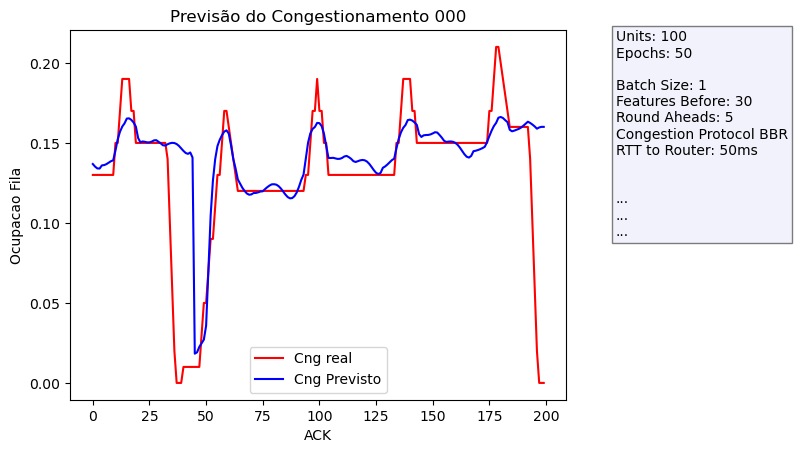

##################Round  1  ##################################
7/7 [==============================] - 3s 31ms/step


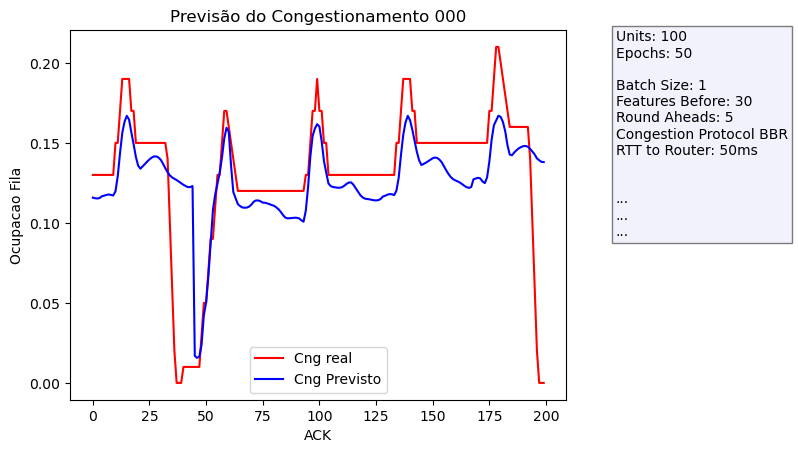

In [37]:
'''
description = "1 longos (4GB)."+"\n"  
description =description + "Dumbell (1000MB,1MB de bottleneck); todos os RTT=100ms.\n"
description =description + "Tempo de Simulação:10min.\n"

GeneralTraining(parExpDir="./Exp_0000006/",
                parTrainingPath="./Exp_0000006/training_client01.csv",
                parTestPath="./Exp_0000006/test_client01.csv",
                parExpDescription=description)
'''

# Terminais: 03, dois longos (4GB) e um "Very Short" (10KB).  
# Topologia: Dumbell, com 1000MB e  2MB de bottleneck
# Tempo de Simulação: 5min. 

##################Round  0  ##################################
7/7 [==============================] - 2s 25ms/step


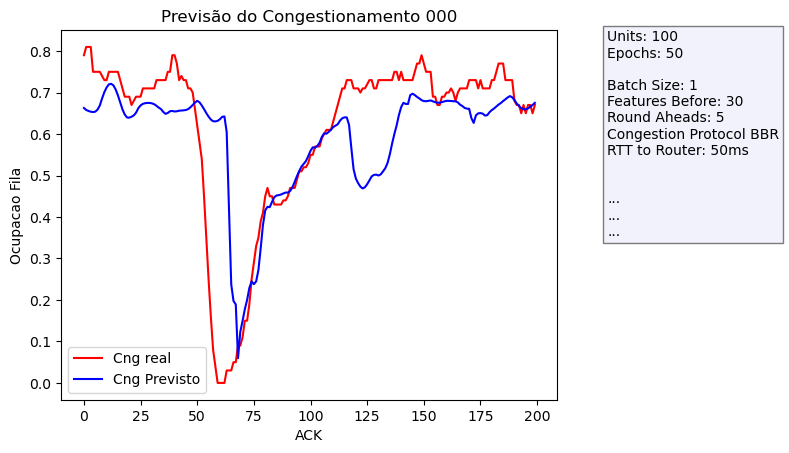

##################Round  1  ##################################
7/7 [==============================] - 2s 29ms/step


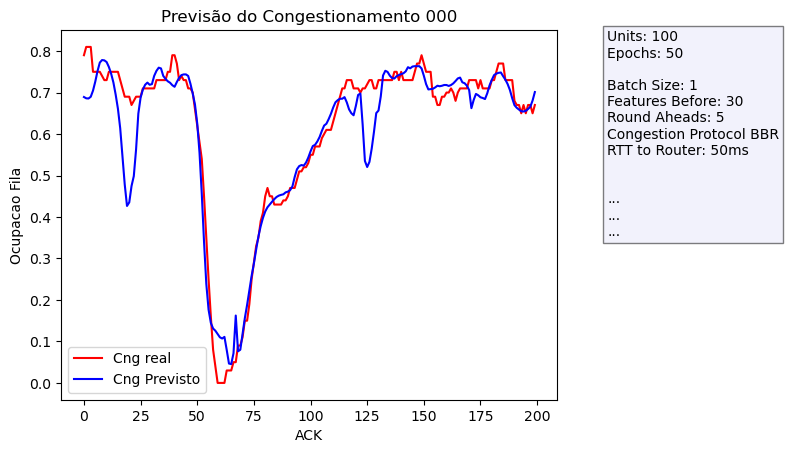

In [10]:
'''
description = "Terminais: 03, dois longos (4GB) e um Very Small (10KB)."+"\n"  
description =description + "Topologia: Dumbell\n"
description =description + "Tempo de Simulação:5min.\n"

GeneralTraining(parExpDir="./Exp_000008/",
                parTrainingPath="./Exp_000008/training_client01.csv",
                parTestPath="./Exp_000008/test_client01.csv",
                parExpDescription=description)
                
'''

# Terminais: 09, 05 longos (4GB), dois "Very Short" (10KB) e dois "Short" (100KB).  
# # Topologia: Dumbell (1000MB,3MB de bottleneck), RTT1=50ms, Salto RTT= 50ms.
# Tempo de Simulação: 15min. 

##################Round  0  ##################################
7/7 [==============================] - 2s 30ms/step


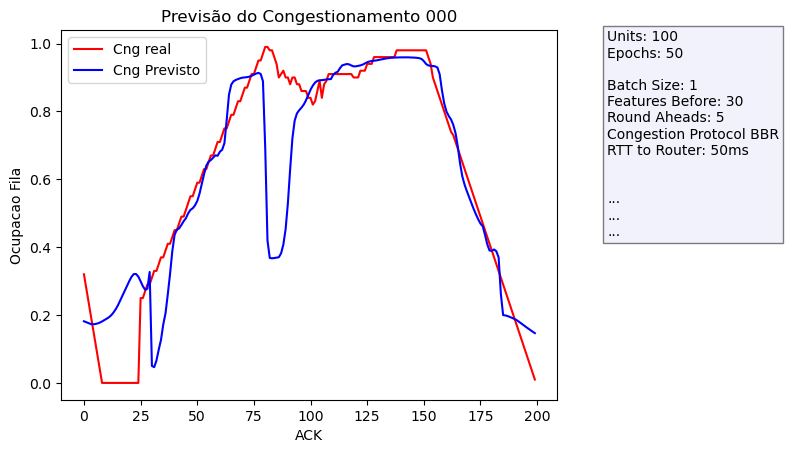

##################Round  1  ##################################
7/7 [==============================] - 2s 31ms/step


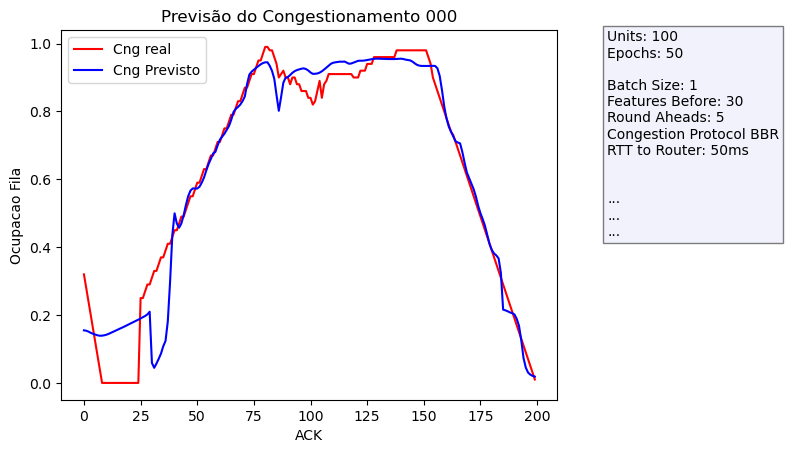

In [11]:
'''
description = "Terminais: 09, 05 longos (4GB), dois Very Short (10KB) e dois Short (100KB)."+"\n"  
description =description + "Topologia: Dumbell (1000MB,3MB de bottleneck), RTT1=50ms, Salto RTT= 50ms.\n"
description =description + "Tempo de Simulação:15min.\n"

GeneralTraining(parExpDir="./Exp_000009/",
                parTrainingPath="./Exp_000009/training_client01.csv",
                parTestPath="./Exp_000009/test_client01.csv",
                parExpDescription=description)
'''
                

# Terminais: 20, 10 longos (4GB), 05 "Very Short" (10KB) e 05 "Short" (100KB).  
# # Topologia: Dumbell (1000MB,1MB de bottleneck), RTT1=50ms, Salto RTT= 50ms. 
# Tempo de Simulação: 30min.

Durante a geração de dados, observousee que a partir de um determinado período o buffer do roteador estabilizava. A explicação é que o BBR ajustava os fluxos de forma a evtar o congestionamento. O que foi feito então foi colocar os não-longos para o terço final da simulação (t_start = 5.0+2*expSimulationTime/3+i+ (float)((rand()%10)/10)) isso foi suficiente para manter o buffer do roteador vriando até o final do experimento.

##################Round  0  ##################################
7/7 [==============================] - 2s 24ms/step


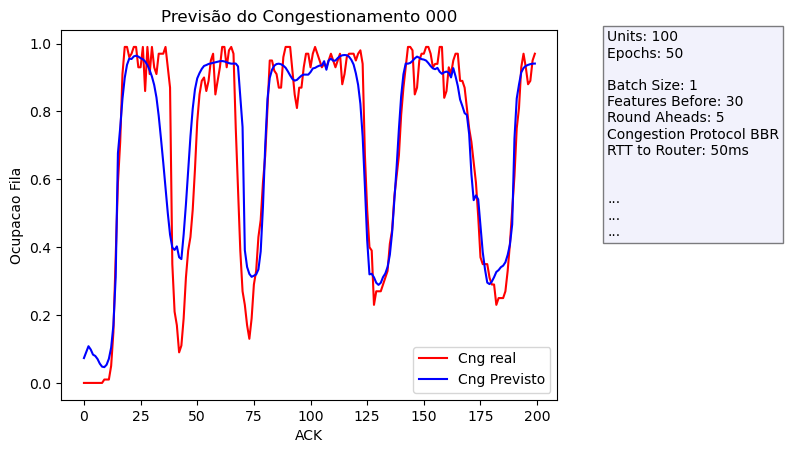

##################Round  1  ##################################
7/7 [==============================] - 2s 29ms/step


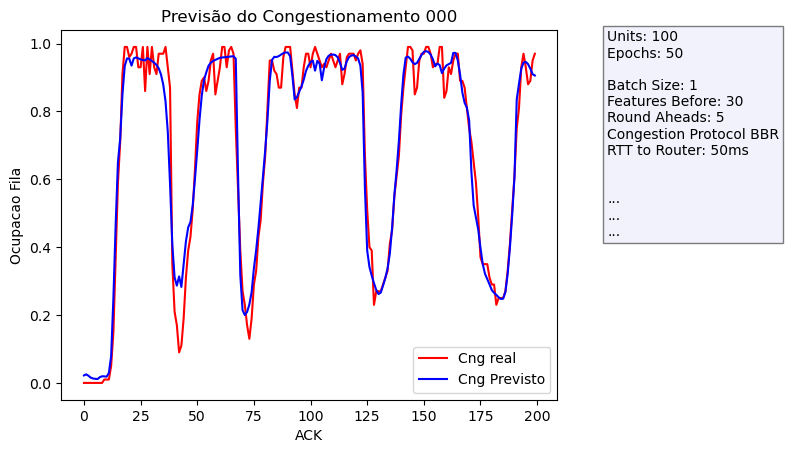

In [34]:
'''
description = "Terminais: 20, 10 longos (4GB), 05 Very Short (10KB) e 05 Short (100KB)."+"\n"  
description =description + "Topologia: Dumbell (1000MB,1MB de bottleneck), RTT1=50ms, Salto RTT= 50ms.\n"
description =description + "Tempo de Simulação:30min.\n"
description = description+ "Durante a geração de dados, observou-se que a partir de um determinado período \n"
description = description+ "o buffer do roteador estabilizava. A explicação é que o BBR ajustava os fluxos de\n"
description = description+ "forma a evtar o congestionamento. O que foi feito então foi colocar os não-longos\n"
description = description+ "para o terço final da simulação (t_start = 5.0+2*expSimulationTime/3+i+ (float)((rand()%10)/10))\n"
description = description+ "isso foi suficiente para manter o buffer do roteador vriando até o final do experimento.\n"

GeneralTraining(parExpDir="./Exp_0000010/",
                parTrainingPath="./Exp_0000010/training_client01.csv",
                parTestPath="./Exp_0000010/test_client01.csv",
                parExpDescription=description)
'''

# Terminais: 40, 20 longos (4GB), 10 "Very Short" (10KB) e 10 "Short" (100KB), entrando no terço final da simulação.  
# # Topologia: Dumbell (1000MB,1MB de bottleneck), Terminal base 10ms; servidor 100ms;  RTT1=100ms, Salto RTT= 50ms. 
# Tempo de Simulação: 60min.


Nos experimentos, o protocolo fixado foi o BBR. Ficou comprovado que o BBR privilegia os fluxos mais recentes. Para evitar isso, foi necessário estreitar o gargalo para 1M. Essa solução foi pensada, pois supõe-se que, se a banda é grande, o probe do BBR acaba achando mais banda para os fluxos tardios que entram na retração dos anteriores. Mesmo assim, os tardios ficaram muito próximos. Lembrando que o Fluxo inicial fica, inicialmente, pelo menos 30s transmitindo exclusivamente.
Outro fato interessante é que parece que o BBR, na abundância de banda, acaba estabilizando as taxas, mantendo o buffer do roteado sempre aliviado, o que é ruim para as previsões, que usam como texte o final dos registros.

##################Round  0  ##################################
7/7 [==============================] - 3s 27ms/step


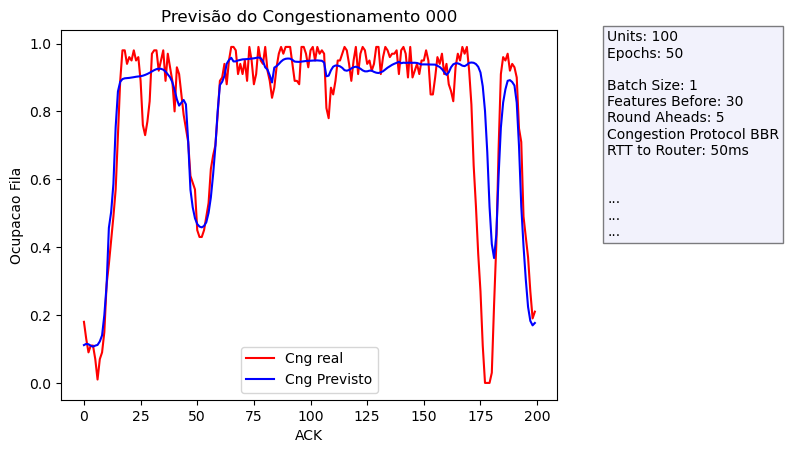

##################Round  1  ##################################
7/7 [==============================] - 2s 24ms/step


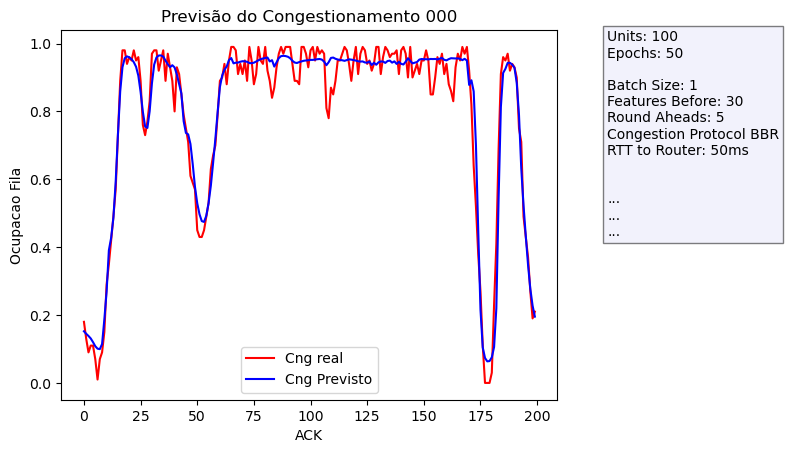

In [35]:
'''
description = "Terminais: 40, 20 longos (4GB), 10 Very Short (10KB) e 10 Short (100KB), entrando no terço final da simulação."+"\n"  
description =description + "Topologia: Dumbell (1000MB,1MB de bottleneck), Terminal base 10ms; servidor 100ms;  RTT1=100ms, Salto RTT= 50ms.\n"
description =description + "Tempo de Simulação:60min.\n"
description = description+ "Nos experimentos, o protocolo fixado foi o BBR. Ficou comprovado que o BBR privilegia os fluxos mais recentes \n"
description = description+ "Para evitar isso, foi necessário estreitar o gargalo para 1M. Essa solução foi pensada, pois supõe-se que, se a banda é grande, o probe do BBR acaba achando mais banda para os fluxos tardios que entram na retração dos anteriores\n"
description = description+ "Mesmo assim, os tardios ficaram muito próximos. Lembrando que o Fluxo inicial fica, inicialmente, pelo menos 30s transmitindo exclusivamente.\n"
description = description+ "Outro fato interessante é que parece que o BBR, na abundância de banda, acaba estabilizando as taxas, mantendo o buffer do roteado sempre aliviado, o que é ruim para as previsões, que usam como texte o final dos registros.\n"
description = description+ ".\n"

GeneralTraining(parExpDir="./Exp_0000011/",
                parTrainingPath="./Exp_0000011/training_client01.csv",
                parTestPath="./Exp_0000011/test_client01.csv",
                parExpDescription=description)
'''


# Terminais: 40, 20 longos (4GB), 10 "Very Short" (10KB) e 10 "Short" (100KB), entrando no terço final da simulação.  
# # Topologia: Parking Lot (1000MB entre os terminias e os roteadores , 1MB de bottleneck), RTT Terminal base 0,5ms; RTT servidor 10ms;  RTT1=5ms; salto RTT= 5ms. 
# Tempo de Simulação: 60min.
# Este experimento visa medir a aderência do modelo gerado na dumbell do experimento anterior na parkinglot aqui descrita. Sendo assim, o test_client01 foi originado com dados levantados da parkinglot, que serão previstos pelos pesos treinados com os dados da dumbell anterior.


Na topologia considerada, ajustou-se os RTT entre os roteadores de 5ms, de forma que desse os 100ms das dumbell consideradas nos experimentos anteriores. Colocando 100ms para cada roteador ficou muito lenta a troca de pacortes e, consequentemnete, a geração dos arquivos 

From File
FromFile
7/7 [==============================] - 3s 28ms/step


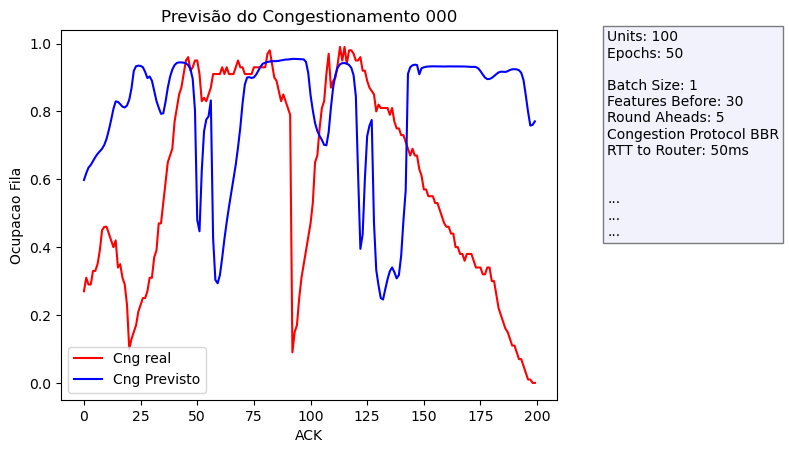

In [54]:

description = "40, 20 longos (4GB), 10 Very Short (10KB) e 10 Short (100KB), entrando no terço final da simulação"+"\n"  
description =description + "Topologia: Parking Lot (1000MB entre os terminias e os roteadores , 1MB de bottleneck), RTT Terminal base 0,5ms; RTT servidor 10ms; RTT1=5ms; salto RTT= 5ms.\n"
description =description + "Tempo de Simulação:60min.\n"
description = description+ "Este experimento visa medir a aderência do modelo gerado na dumbell do experimento anterior na parkinglot aqui descrita\n"
description = description+ "Sendo assim, o test_client01 foi originado com dados levantados da parkinglot, que serão previstos pelos pesos treinados com os dados da dumbell anterior.\n"
description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 5ms, de forma que desse os 100ms das dumbell consideradas nos experimentos anteriores. Colocando 100ms para cada roteador ficou muito lenta a troca de pacortes e, consequentemnete, a geração dos arquivos .\n"
description = description+ "Também foi retirada a calda de zeros no final do test_client01.\n"
#description = description+ ".\n"

EvalueteModelLevarage(parPreviousExpTime="Mon_May_15_19_39_17_2023",
                      parPreviousTrainingExpDir="./Exp_0000011/Mon_May_15_19_39_17_2023/",
                      parPreviousTrainingPath="./Exp_0000011/training_client01.csv",
                      parPathTestFromAnotherTopology="./Exp_0000011/test_client01.csv",
                      parExpDescription=description)


Pelos resultado acima, percebeu-se que não aderiu muito bem. A ideia então foi fazer um experimento com os mesmos RTT da dumbell base

From File
FromFile
7/7 [==============================] - 3s 29ms/step


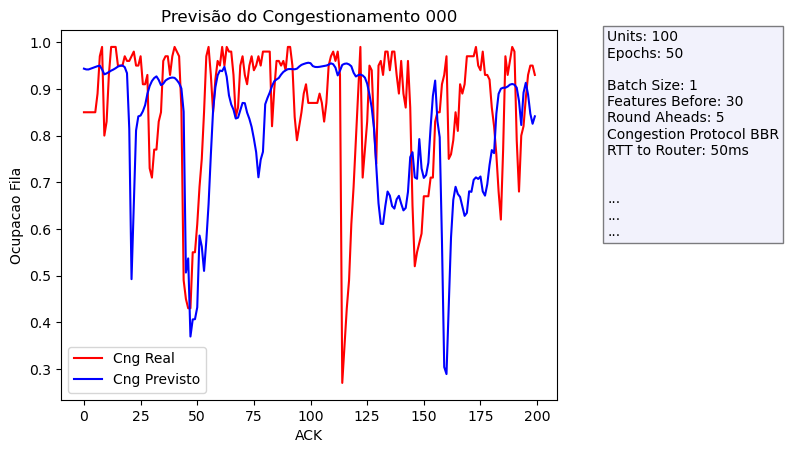

In [58]:
description = "40, 20 longos (4GB), 10 Very Short (10KB) e 10 Short (100KB), entrando no terço final da simulação"+"\n"  
description =description + "Topologia: Parking Lot (1000MB entre os terminias e os roteadores , 1MB de bottleneck), RTT Terminal base 10ms; RTT servidor 100ms; RTT1=50ms; salto RTT= 50ms.\n"
description =description + "Tempo de Simulação:60min.\n"
description = description+ "Este experimento visa medir a aderência do modelo gerado na dumbell do experimento anterior na parkinglot aqui descrita\n"
description = description+ "Sendo assim, o test_client01 foi originado com dados levantados da parkinglot, que serão previstos pelos pesos treinados com os dados da dumbell anterior.\n"
description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 5ms, de forma que desse os 100ms das dumbell consideradas nos experimentos anteriores. Colocando 100ms para cada roteador ficou muito lenta a troca de pacortes e, consequentemnete, a geração dos arquivos .\n"
description = description+ "Também foi retirada a calda de zeros no final do test_client01.\n"
#description = description+ ".\n"

EvalueteModelLevarage(parPreviousExpTime="Mon_May_15_19_39_17_2023",
                      parPreviousTrainingExpDir="./Exp_0000011/Mon_May_15_19_39_17_2023/",
                      parPreviousTrainingPath="./Exp_0000011/training_client01.csv",
                      parPathTestFromAnotherTopology="./Exp_0000011/test_client01.csv",
                      parExpDescription=description)


Agora vamos diminuir os RTT entre os toreadores, para ver se o modelo adere melhor. O RTT entre os roteadores caiu de 0,5 para 0,005ms

From File
FromFile
7/7 [==============================] - 2s 28ms/step


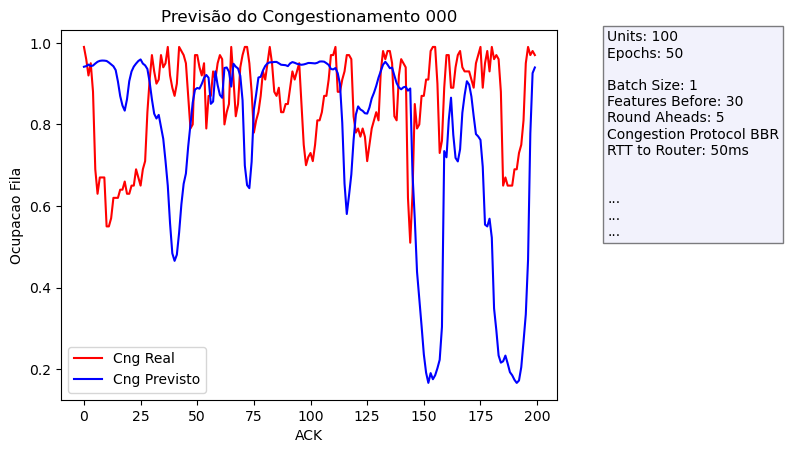

In [59]:
description = "40, 20 longos (4GB), 10 Very Short (10KB) e 10 Short (100KB), entrando no terço final da simulação"+"\n"  
description =description + "Topologia: Parking Lot (1000MB entre os terminias e os roteadores , 1MB de bottleneck), RTT Terminal base 0,5ms; RTT servidor 10ms; RTT1=5ms; salto RTT= 5ms.\n"
description =description + "Tempo de Simulação:60min.\n"
description = description+ "Este experimento visa medir a aderência do modelo gerado na dumbell do experimento anterior na parkinglot aqui descrita\n"
description = description+ "Sendo assim, o test_client01 foi originado com dados levantados da parkinglot, que serão previstos pelos pesos treinados com os dados da dumbell anterior.\n"
description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"

EvalueteModelLevarage(parPreviousExpTime="Mon_May_15_19_39_17_2023",
                      parPreviousTrainingExpDir="./Exp_0000011/Mon_May_15_19_39_17_2023/",
                      parPreviousTrainingPath="./Exp_0000011/training_client01.csv",
                      parPathTestFromAnotherTopology="./Exp_0000011/test_client01.csv",
                      parExpDescription=description)


Agora, vamos testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento. O resultado a seguir é de um arquivo em que o nó base foi estrangulado, ou seja, ficou com uma quantidade de acks bem aquém da dos outros fluxos longos.

From File
FromFile
7/7 [==============================] - 2s 28ms/step


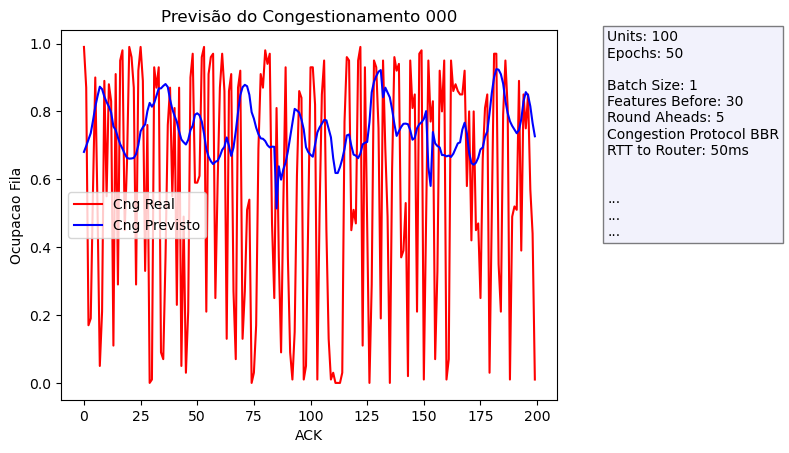

In [61]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
#description =description + "Topologia: Parking Lot (1000MB entre os terminias e os roteadores , 1MB de bottleneck), RTT Terminal base 0,5ms; RTT servidor 10ms; RTT1=5ms; salto RTT= 5ms.\n"
#description =description + "Tempo de Simulação:60min.\n"
#description = description+ "Este experimento visa medir a aderência do modelo gerado na dumbell do experimento anterior na parkinglot aqui descrita\n"
#description = description+ "Sendo assim, o test_client01 foi originado com dados levantados da parkinglot, que serão previstos pelos pesos treinados com os dados da dumbell anterior.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"

EvalueteModelLevarage(parPreviousExpTime="Mon_May_15_19_39_17_2023",
                      parPreviousTrainingExpDir="./Exp_0000011/Mon_May_15_19_39_17_2023/",
                      parPreviousTrainingPath="./Exp_0000011/training_client01.csv",
                      parPathTestFromAnotherTopology="./Exp_0000011/test_client01.csv",
                      parExpDescription=description)


Agora, vamos a um em que o nó base não foi estrangulado

From File
FromFile
7/7 [==============================] - 2s 27ms/step


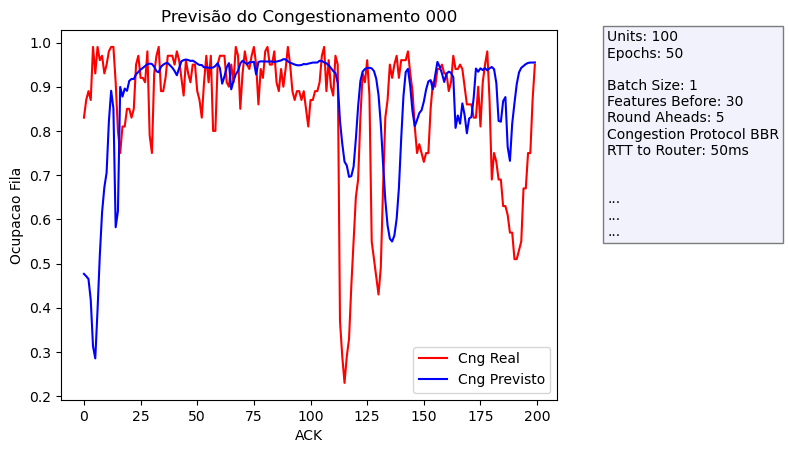

In [62]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
#description =description + "Topologia: Parking Lot (1000MB entre os terminias e os roteadores , 1MB de bottleneck), RTT Terminal base 0,5ms; RTT servidor 10ms; RTT1=5ms; salto RTT= 5ms.\n"
#description =description + "Tempo de Simulação:60min.\n"
#description = description+ "Este experimento visa medir a aderência do modelo gerado na dumbell do experimento anterior na parkinglot aqui descrita\n"
#description = description+ "Sendo assim, o test_client01 foi originado com dados levantados da parkinglot, que serão previstos pelos pesos treinados com os dados da dumbell anterior.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"

EvalueteModelLevarage(parPreviousExpTime="Mon_May_15_19_39_17_2023",
                      parPreviousTrainingExpDir="./Exp_0000011/Mon_May_15_19_39_17_2023/",
                      parPreviousTrainingPath="./Exp_0000011/training_client01.csv",
                      parPathTestFromAnotherTopology="./Exp_0000011/test_client01.csv",
                      parExpDescription=description)


In [ ]:
Será que o newReno produz uma coisa mais estável? Será que sem a cwnd fica melhor? 
Será que requer um espaço de treinamento maior?

# Devido à grande variação no tamanho do buffer, será previsto a média de variação expoponencial móvel da fila no roteador

##################Round  0  ##################################
7/7 [==============================] - 2s 22ms/step


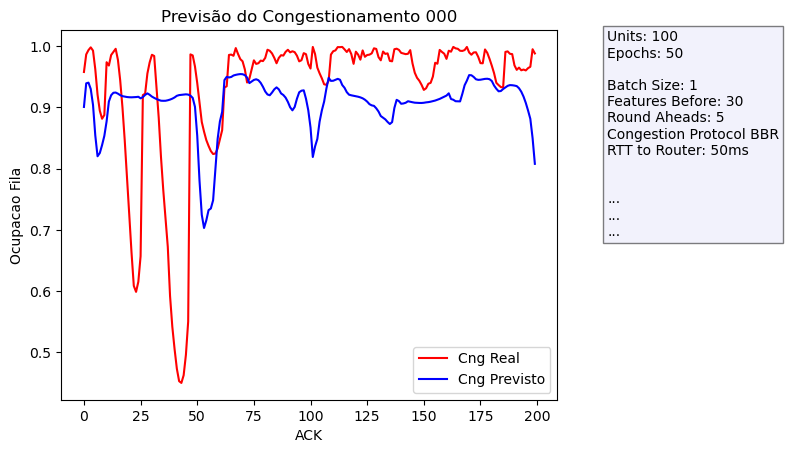

##################Round  1  ##################################
7/7 [==============================] - 2s 24ms/step


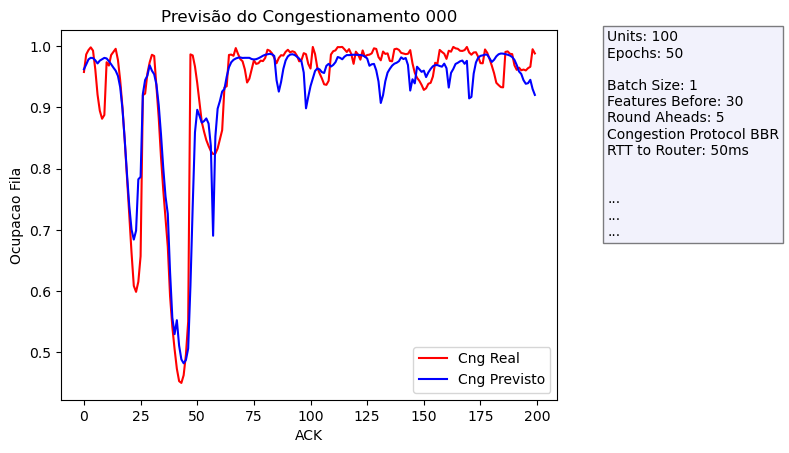

In [64]:

description = "Terminais: 40, 20 longos (4GB), 10 Very Short (10KB) e 10 Short (100KB), entrando no terço final da simulação."+"\n"  
description =description + "Topologia: Dumbell (1000MB,1MB de bottleneck), Terminal base 10ms; servidor 100ms;  RTT1=100ms, Salto RTT= 50ms.\n"
description =description + "Tempo de Simulação:30min.\n"
description = description+ "Prevendo a média móvel.\n"

GeneralTraining(parExpDir="./Exp_0000013/",
                parTrainingPath="./Exp_0000013/training_client01.csv",
                parTestPath="./Exp_0000013/test_client01.csv",
                parExpDescription=description)


Rodando com outro experimento, ou seja, com dados de outra simulação

From File
FromFile
7/7 [==============================] - 3s 29ms/step


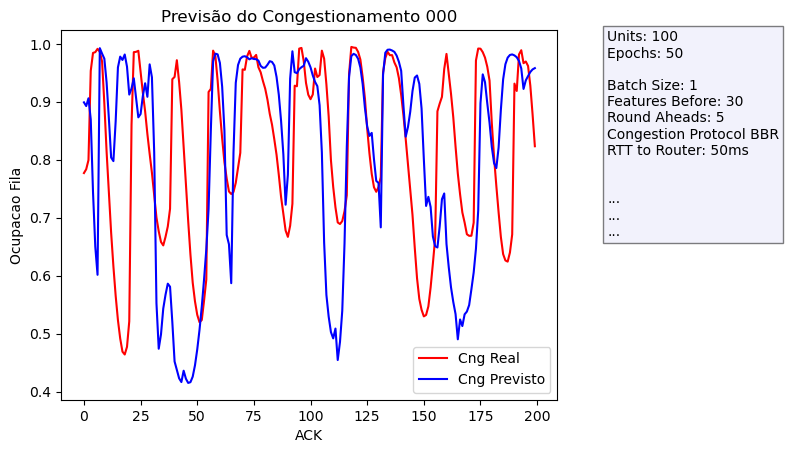

In [67]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila.\n"
#description =description + "Tempo de Simulação:60min.\n"
#description = description+ "Este experimento visa medir a aderência do modelo gerado na dumbell do experimento anterior na parkinglot aqui descrita\n"
#description = description+ "Sendo assim, o test_client01 foi originado com dados levantados da parkinglot, que serão previstos pelos pesos treinados com os dados da dumbell anterior.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"

EvalueteModelLevarage(parPreviousExpTime="Thu_May_18_11_09_30_2023",
                      parPreviousTrainingExpDir="./Exp_0000013/Thu_May_18_11_09_30_2023/",
                      parPreviousTrainingPath="./Exp_0000013/training_client01.csv",
                      parPathTestFromAnotherTopology="./Exp_0000013/test_client01.csv",
                      parExpDescription=description)


Vamos aumentar o número de épocas (300 por round) para ver se o modelo produzido adere melhor

##################Round  0  ##################################
7/7 [==============================] - 4s 27ms/step


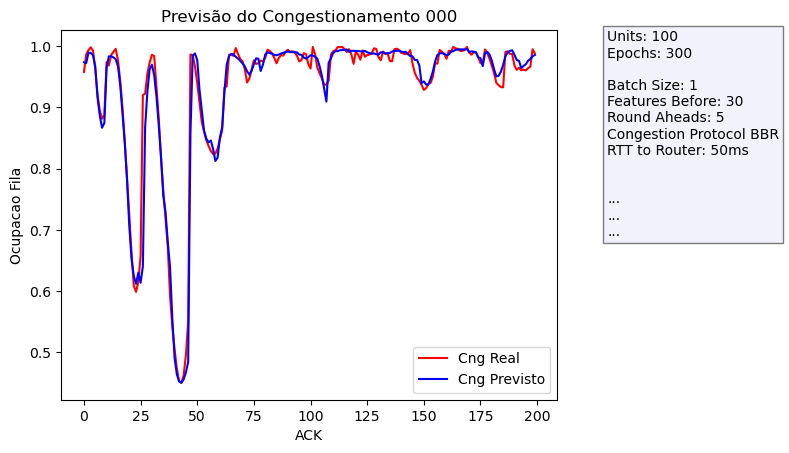

##################Round  1  ##################################
7/7 [==============================] - 3s 21ms/step


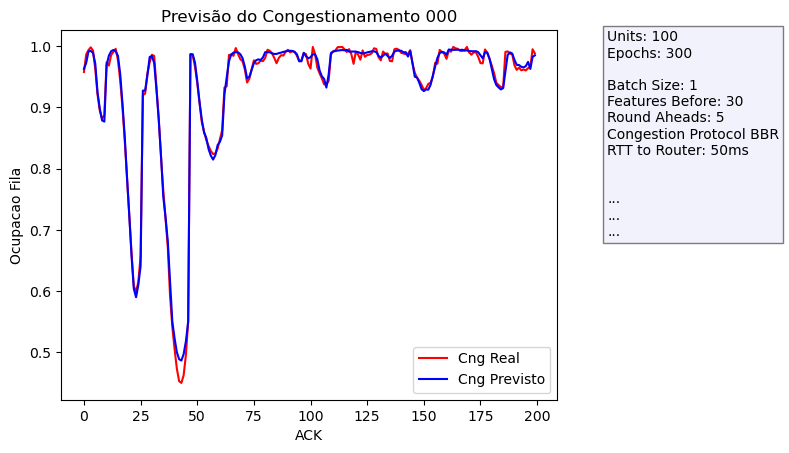

In [69]:
description = "Terminais: 40, 20 longos (4GB), 10 Very Short (10KB) e 10 Short (100KB), entrando no terço final da simulação."+"\n"  
description =description + "Topologia: Dumbell (1000MB,1MB de bottleneck), Terminal base 10ms; servidor 100ms;  RTT1=100ms, Salto RTT= 50ms.\n"
description =description + "Tempo de Simulação:30min.\n"
description = description+ "Prevendo a média móvel.\n"
description = description+ "300 épocas a cada Round.\n"

GeneralTraining(parExpDir="./Exp_0000013/",
                parTrainingPath="./Exp_0000013/training_client01.csv",
                parTestPath="./Exp_0000013/test_client01.csv",
                parExpDescription=description)


Agora vejamos se o modelo "mais treinado" vai aderir melhor as dados gerados por outro expérimento, que não serviram de treinamento

From File
FromFile
7/7 [==============================] - 3s 25ms/step


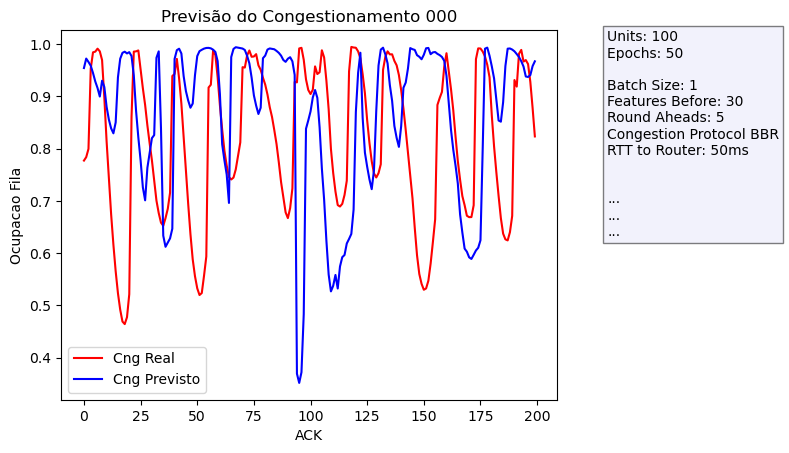

In [73]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila.\n"
description =description + "Modelo com 300 épocas em cada round\n"
#description = description+ "Este experimento visa medir a aderência do modelo gerado na dumbell do experimento anterior na parkinglot aqui descrita\n"
#description = description+ "Sendo assim, o test_client01 foi originado com dados levantados da parkinglot, que serão previstos pelos pesos treinados com os dados da dumbell anterior.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"

EvalueteModelLevarage(parPreviousExpTime="Thu_May_18_20_12_51_2023",
                      parPreviousTrainingExpDir="./Exp_0000013/Thu_May_18_20_12_51_2023/",
                      parPreviousTrainingPath="./Exp_0000013/training_client01.csv",
                      parPathTestFromAnotherTopology="./Exp_0000013/test_client01.csv",
                      parExpDescription=description)


Como visto anteriomente, o modelo não aderiu bem. Supôs-se falta de treinamento. Então concatenou-se três arquivos de 
expetimeos diferentes, na busca por um modelo mais geral

##################Round  0  ##################################
7/7 [==============================] - 8s 26ms/step


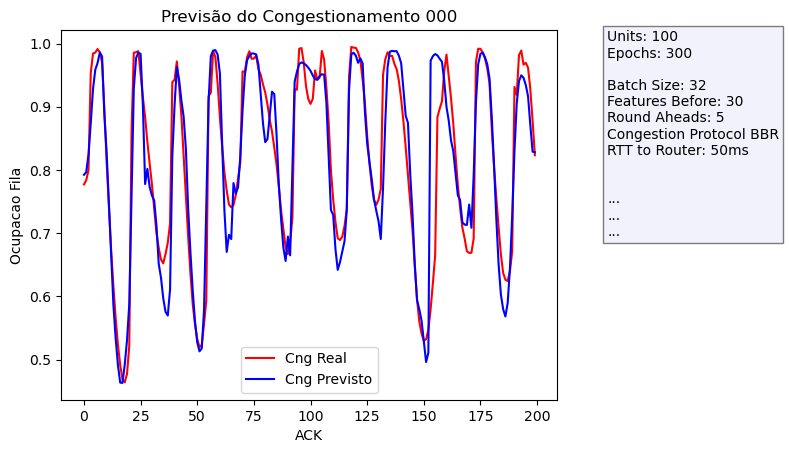

##################Round  1  ##################################
7/7 [==============================] - 3s 26ms/step


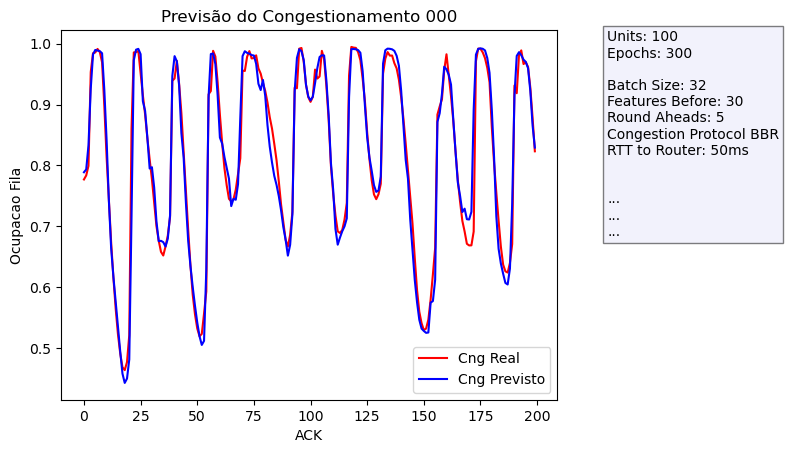

In [76]:
description = "Terminais: 40, 20 longos (4GB), 10 Very Short (10KB) e 10 Short (100KB), entrando no terço final da simulação."+"\n"  
description =description + "Topologia: Dumbell (1000MB,1MB de bottleneck), Terminal base 10ms; servidor 100ms;  RTT1=100ms, Salto RTT= 50ms.\n"
description =description + "Tempo de Simulação:30min.\n"
description = description+ "Prevendo a média móvel.\n"
description = description+ "300 épocas a cada Round.\n"
description = description+ "Concatenação de tres experimentos distintos.\n"
GeneralTraining(parExpDir="./Exp_0000013/",
                parTrainingPath="./Exp_0000013/training_client01.csv",
                parTestPath="./Exp_0000013/test_client01.csv",
                parExpDescription=description)

Um teste bem restrito é verificar com um dos modelos que geraram a concatenação do experimento acima. Vamos ver os resultados nessa situação.
Durante esta fase dos experimentos, percebeu-se que a normalização feita pelo python gera resultados diferentes para as previsões isoladas dos arquivos concatenados, pois a nomalização do arquivo, fruto da concatenação, será com valor diferente daquele utilizado para a normalização considerando apenas os dados de um  determinado arquivo. A classe cliente foi adaptada para contornar este fato. Depois dessa adaptação, os resultados foram excelentes, conforme pode ser visto abaixo. Veja que os vaores das cwnd são diferentes daqueles considerados na previsão direta, após o treinamento.

From File
FromFile
7/7 [==============================] - 2s 19ms/step


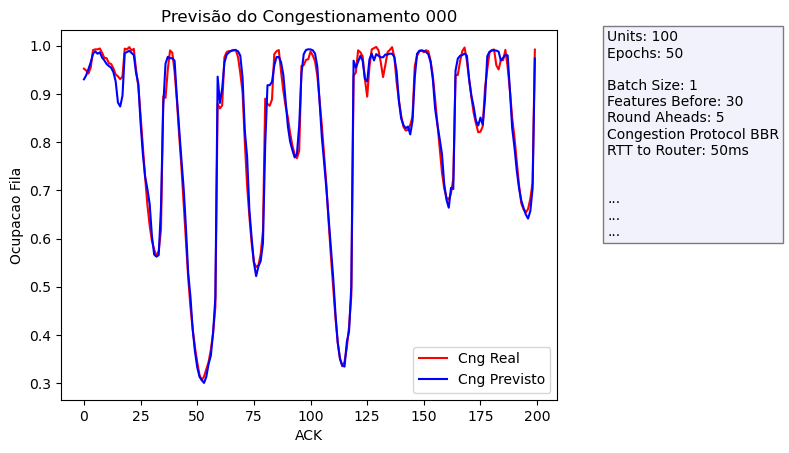

In [3]:
'''
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila.\n"
description =description + "Modelo com 300 épocas em cada round\n"
description = description+ "Verificando a aderencia sobre um dos modelos concatenados\n"
#description = description+ "Sendo assim, o test_client01 foi originado com dados levantados da parkinglot, que serão previstos pelos pesos treinados com os dados da dumbell anterior.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"

mfn.EvalueteModelLevarage(parPreviousExpTime="Fri_May_19_08_45_54_2023",
                      parPreviousTrainingExpDir="./Exp_0000013/Fri_May_19_08_45_54_2023/",
                      parPreviousTrainingPath="./Exp_0000013/training_client01.csv",
                      parPathTestFromAnotherTopology="./Exp_0000013/test_client01.csv",
                      parExpDescription=description)
                      
'''


In [ ]:
Agora, vamos fazer a avaliação de um conjunto de dados que não participou do treinamento

From File
FromFile
7/7 [==============================] - 3s 21ms/step


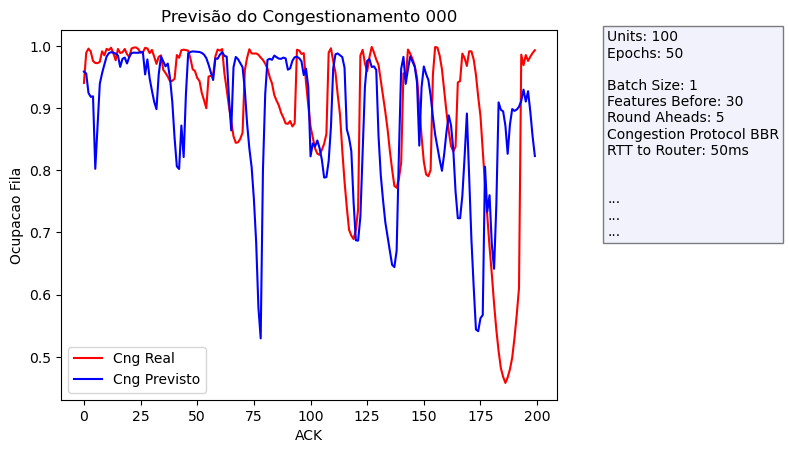

In [4]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila.\n"
description =description + "Modelo com 300 épocas em cada round\n"
description = description+ "Verificando a aderencia sobre um dos modelos concatenados\n"
description = description+ "Dados que não participaram do treinamento, mas gerados na mesma rede.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"

mfn.EvalueteModelLevarage(parPreviousExpTime="Fri_May_19_08_45_54_2023",
                      parPreviousTrainingExpDir="./Exp_0000013/Fri_May_19_08_45_54_2023/",
                      parPreviousTrainingPath="./Exp_0000013/training_client01.csv",
                      parPathTestFromAnotherTopology="./Exp_0000013/test_client01.csv",
                      parExpDescription=description)

Mais um

From File
FromFile
7/7 [==============================] - 2s 19ms/step


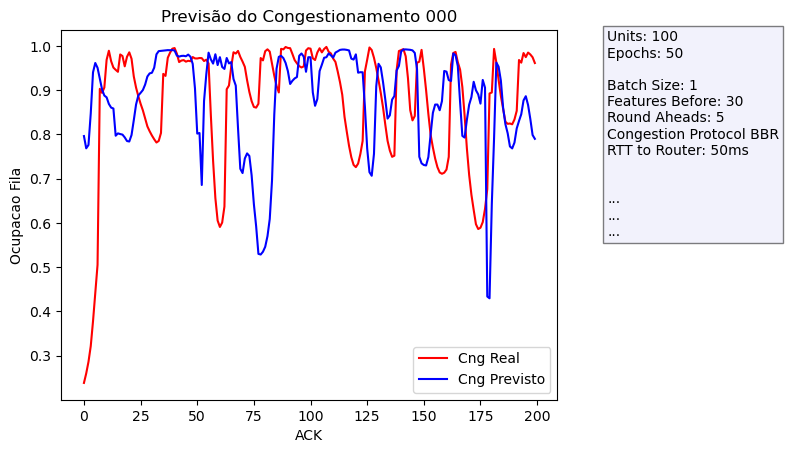

In [5]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila.\n"
description =description + "Modelo com 300 épocas em cada round\n"
description = description+ "Verificando a aderencia sobre um dos modelos concatenados\n"
description = description+ "Dados que não participaram do treinamento, mas gerados na mesma rede.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"

mfn.EvalueteModelLevarage(parPreviousExpTime="Fri_May_19_08_45_54_2023",
                      parPreviousTrainingExpDir="./Exp_0000013/Fri_May_19_08_45_54_2023/",
                      parPreviousTrainingPath="./Exp_0000013/training_client01.csv",
                      parPathTestFromAnotherTopology="./Exp_0000013/test_client01.csv",
                      parExpDescription=description)

Mais um

From File
FromFile
7/7 [==============================] - 2s 19ms/step


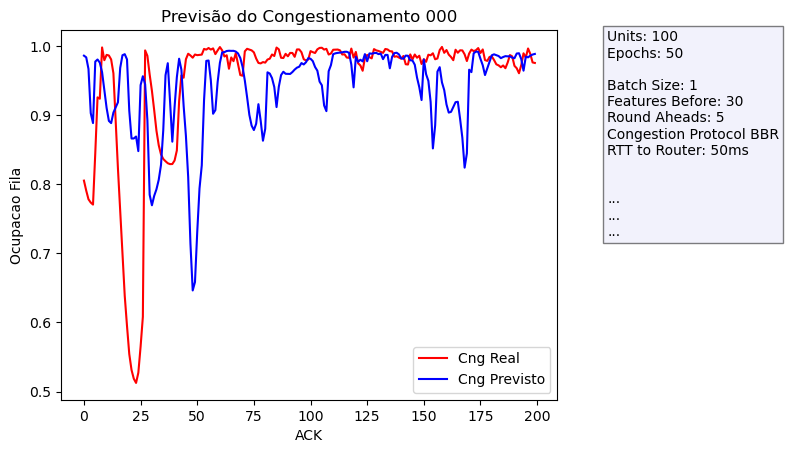

In [6]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila.\n"
description =description + "Modelo com 300 épocas em cada round\n"
description = description+ "Verificando a aderencia sobre um dos modelos concatenados\n"
description = description+ "Dados que não participaram do treinamento, mas gerados na mesma rede.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"

mfn.EvalueteModelLevarage(parPreviousExpTime="Fri_May_19_08_45_54_2023",
                      parPreviousTrainingExpDir="./Exp_0000013/Fri_May_19_08_45_54_2023/",
                      parPreviousTrainingPath="./Exp_0000013/training_client01.csv",
                      parPathTestFromAnotherTopology="./Exp_0000013/test_client01.csv",
                      parExpDescription=description)

Mais um

From File
FromFile
7/7 [==============================] - 2s 19ms/step


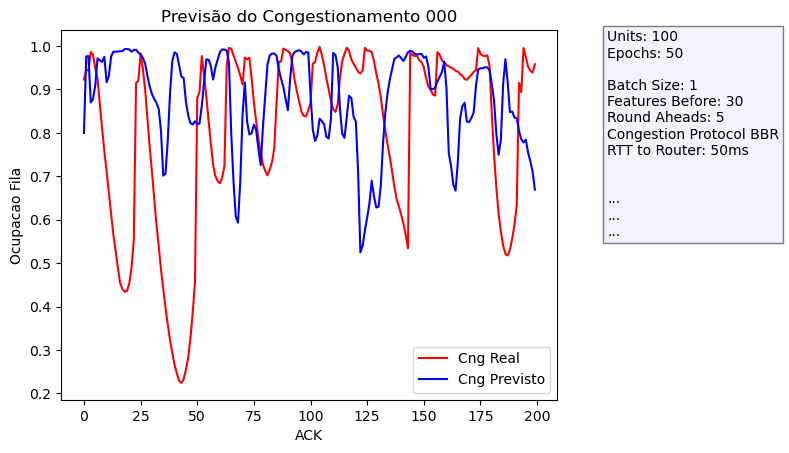

In [7]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila.\n"
description =description + "Modelo com 300 épocas em cada round\n"
description = description+ "Verificando a aderencia sobre um dos modelos concatenados\n"
description = description+ "Dados que não participaram do treinamento, mas gerados na mesma rede.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"

mfn.EvalueteModelLevarage(parPreviousExpTime="Fri_May_19_08_45_54_2023",
                      parPreviousTrainingExpDir="./Exp_0000013/Fri_May_19_08_45_54_2023/",
                      parPreviousTrainingPath="./Exp_0000013/training_client01.csv",
                      parPathTestFromAnotherTopology="./Exp_0000013/test_client01.csv",
                      parExpDescription=description)

# Agora vamos concatenar os dados das 06 simulações anteriores na esperança de achar um modelo aderente à topologia de similação

##################Round  0  ##################################
7/7 [==============================] - 2s 22ms/step


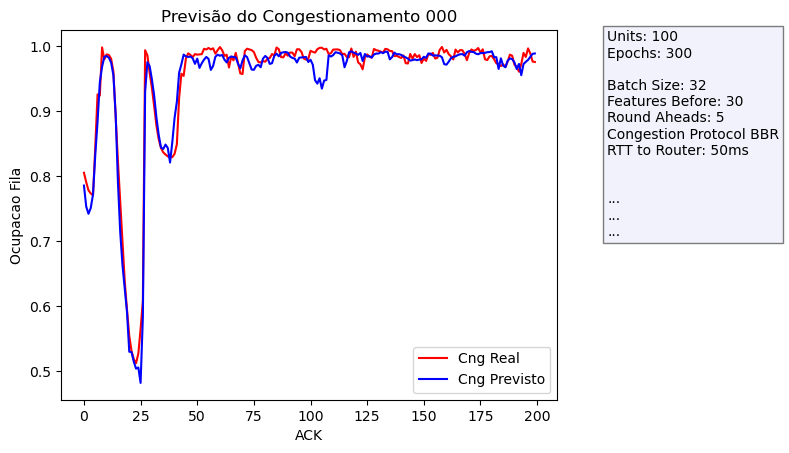

##################Round  1  ##################################
7/7 [==============================] - 2s 26ms/step


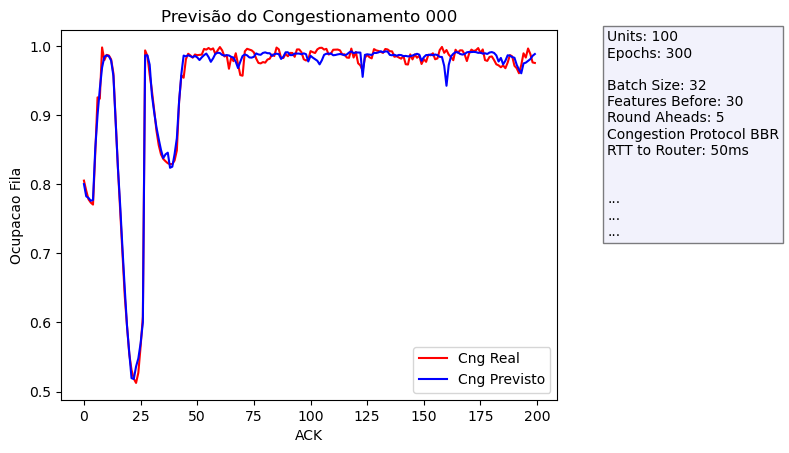

In [2]:
description = "Terminais: 40, 20 longos (4GB), 10 Very Short (10KB) e 10 Short (100KB), entrando no terço final da simulação."+"\n"  
description =description + "Topologia: Dumbell (1000MB,1MB de bottleneck), Terminal base 10ms; servidor 100ms;  RTT1=100ms, Salto RTT= 50ms.\n"
description =description + "Tempo de Simulação:30min.\n"
description = description+ "Prevendo a média móvel.\n"
description = description+ "300 épocas a cada Round.\n"
description = description+ "Concatenação de 06 (seis) experimentos distintos.\n"
mfn.GeneralTraining(parExpDir="./Exp_0000013/",
                parTrainingPath="./Exp_0000013/training_client01.csv",
                parTestPath="./Exp_0000013/test_client01.csv",
                parExpDescription=description)

Agora vamos ver se aderiu melhor

From File
FromFile
7/7 [==============================] - 3s 23ms/step


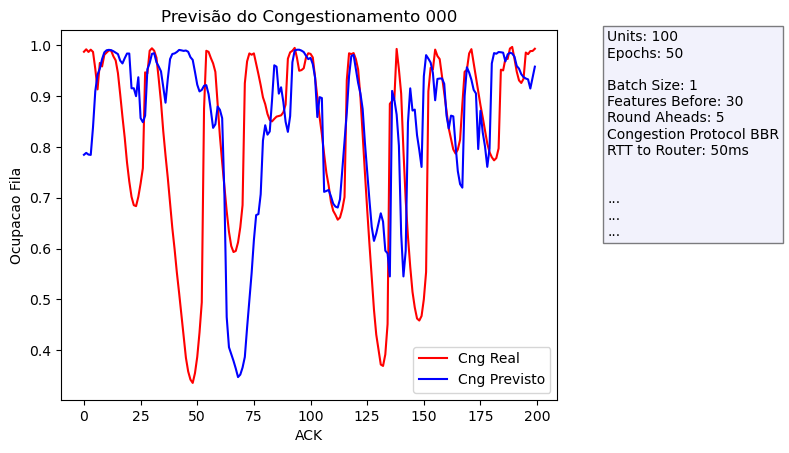

In [6]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila.\n"
description =description + "Modelo com 300 épocas em cada round\n"
description = description+ "Verificando a aderencia sobre um dos modelos concatenados\n"
description = description+ "Dados que não participaram do treinamento, mas gerados na mesma rede.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"

mfn.EvalueteModelLevarage(parPreviousExpTime="Fri_May_19_17_29_35_2023",
                      parPreviousTrainingExpDir="./Exp_0000013/Fri_May_19_17_29_35_2023/",
                      parPreviousTrainingPath="./Exp_0000013/training_client01.csv",
                      parPathTestFromAnotherTopology="./Exp_0000013/test_client01_09.csv",
                      parExpDescription=description)

Melhorou, mas ainda não é o ideal. Vamos treinar com mais dados. Durante os testes, percebeu-se que concatenar os arquivos produzia distorções no cálculo do rtt_ratio, uma vez que o rtt.min() era o mínimo para todos os dados dos experimentos que deram origem ao arquivo concatenado e não o mínimo de cada fluxo. Por isso, elaborou-se uma sistemática de treinos sequenciais, utilizando diversos arquivos de treinamento, conforme pode ser observado no <i>for</i> abaixo. Dessa forma os rtt.min são tomados em relação a cada fuxlo, em cada simulação.

##################Round  0  ##################################
7/7 [==============================] - 2s 20ms/step


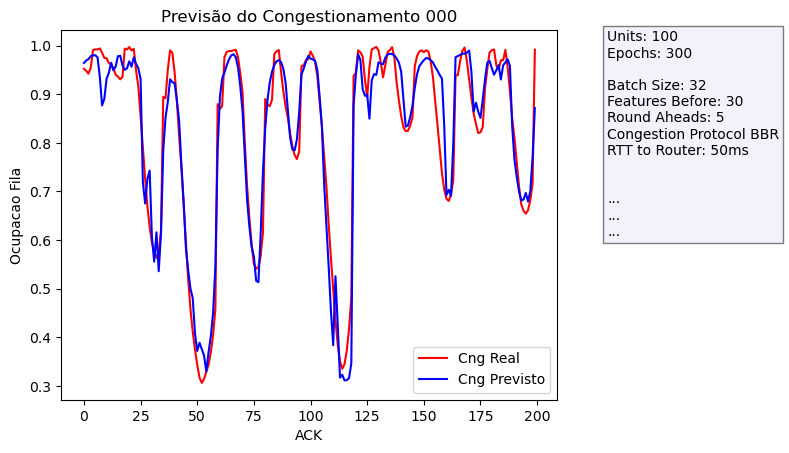

##################Round  1  ##################################
7/7 [==============================] - 2s 22ms/step


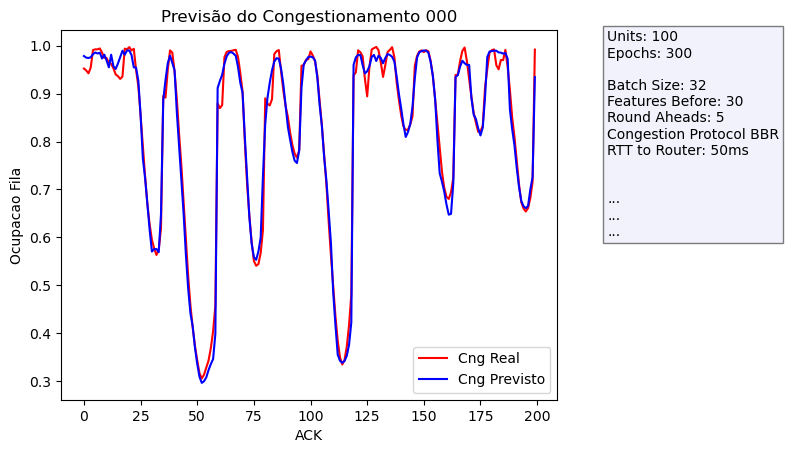

./Exp_0000013/Sat_May_20_16_52_50_2023
Sat_May_20_16_52_50_2023
##################Round  0  ##################################
7/7 [==============================] - 2s 21ms/step


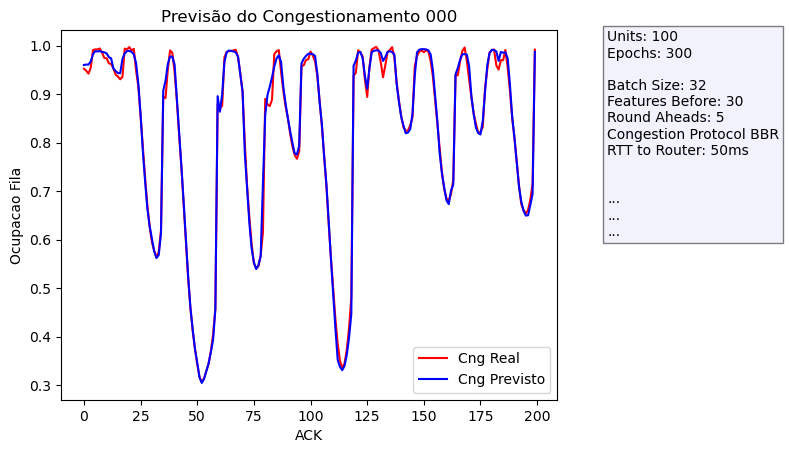

##################Round  1  ##################################
7/7 [==============================] - 3s 21ms/step


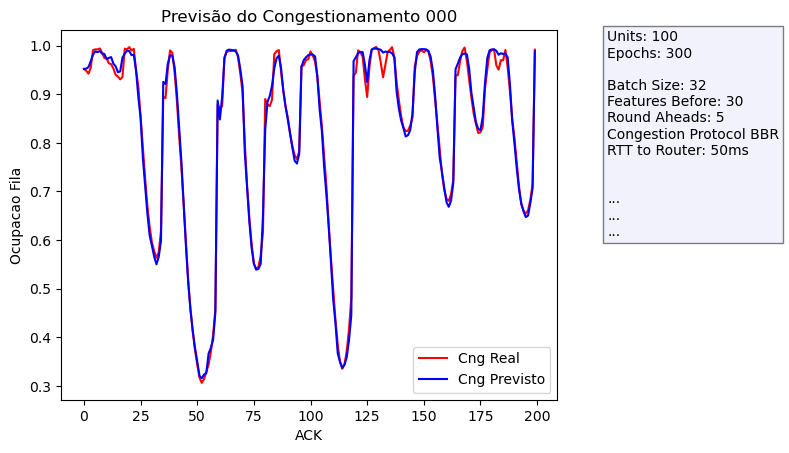

./Exp_0000013/Sat_May_20_16_52_50_2023
Sat_May_20_16_52_50_2023
##################Round  0  ##################################
7/7 [==============================] - 2s 29ms/step


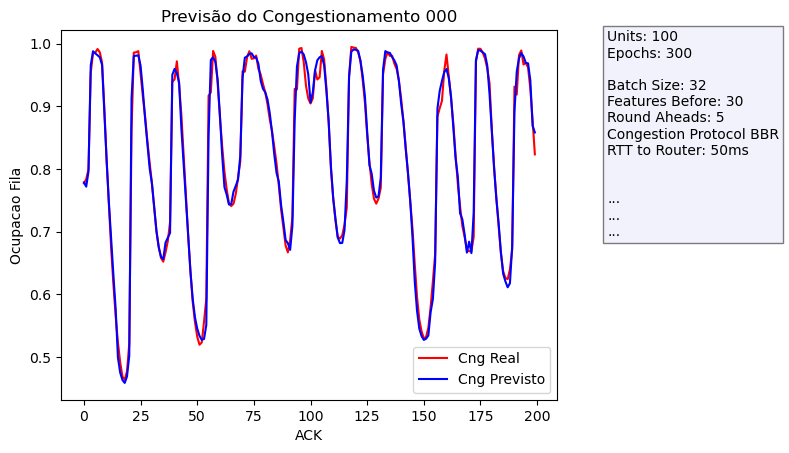

##################Round  1  ##################################
7/7 [==============================] - 2s 23ms/step


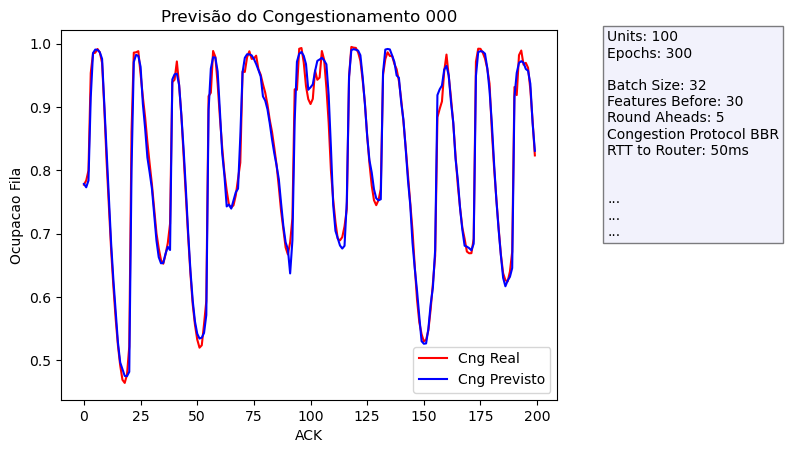

./Exp_0000013/Sat_May_20_16_52_50_2023
Sat_May_20_16_52_50_2023
##################Round  0  ##################################
7/7 [==============================] - 2s 24ms/step


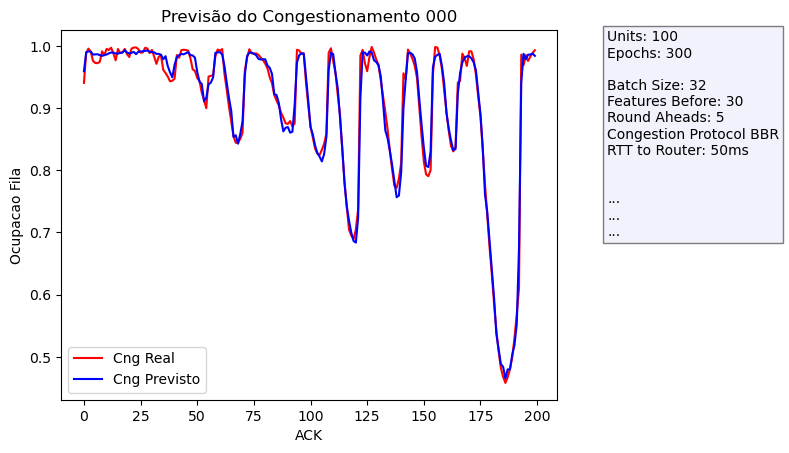

##################Round  1  ##################################
7/7 [==============================] - 2s 28ms/step


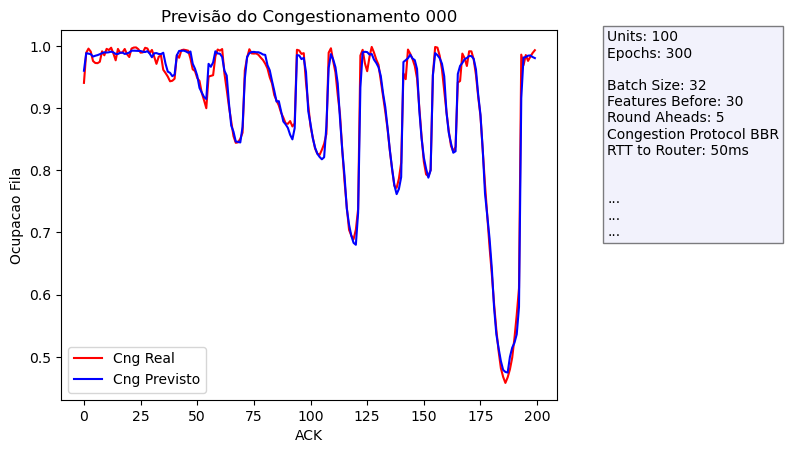

./Exp_0000013/Sat_May_20_16_52_50_2023
Sat_May_20_16_52_50_2023
##################Round  0  ##################################
7/7 [==============================] - 2s 30ms/step


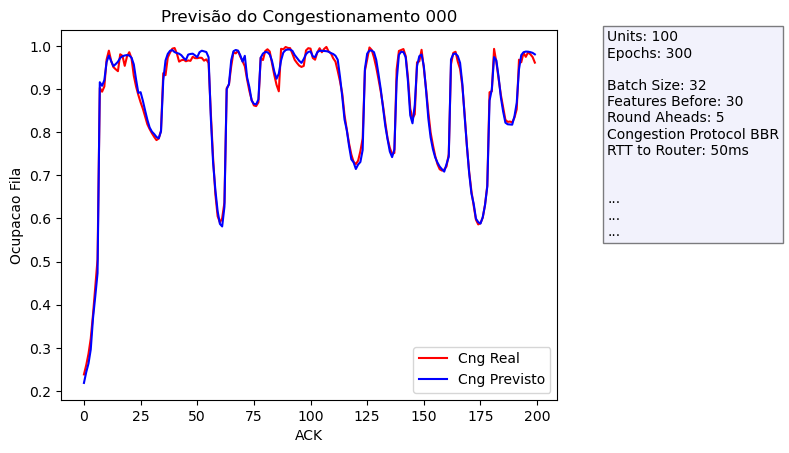

##################Round  1  ##################################
7/7 [==============================] - 3s 38ms/step


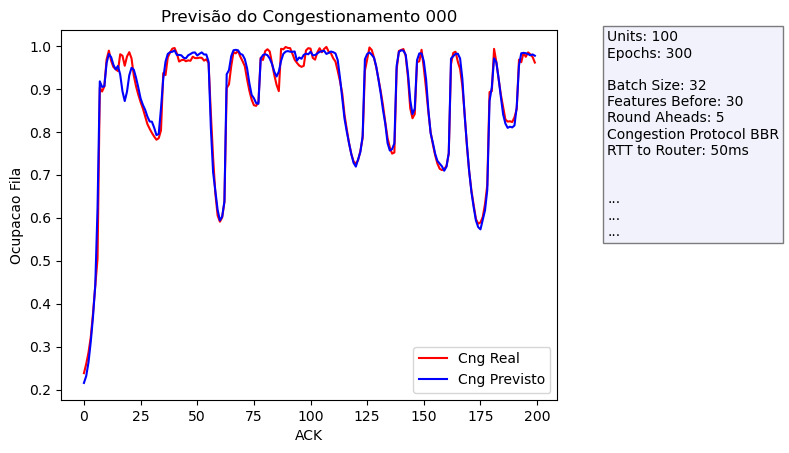

./Exp_0000013/Sat_May_20_16_52_50_2023
Sat_May_20_16_52_50_2023
##################Round  0  ##################################
7/7 [==============================] - 2s 34ms/step


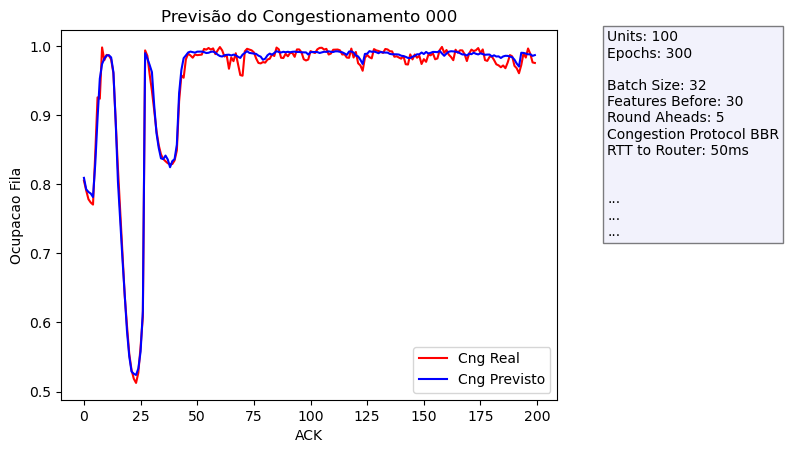

##################Round  1  ##################################
7/7 [==============================] - 3s 42ms/step


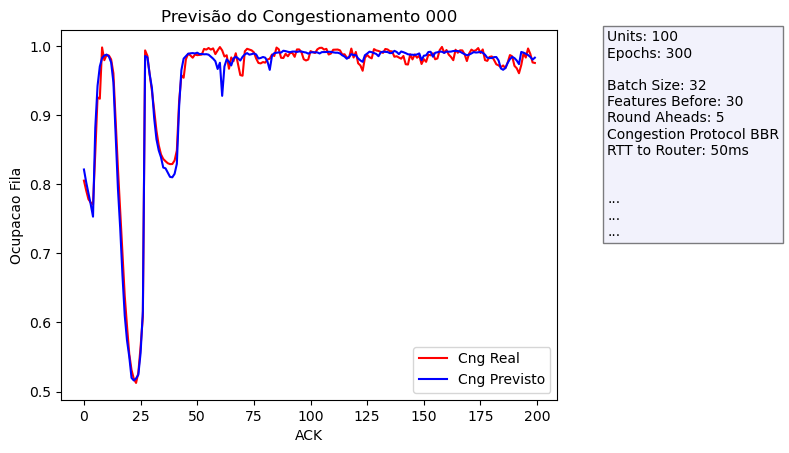

./Exp_0000013/Sat_May_20_16_52_50_2023
Sat_May_20_16_52_50_2023
##################Round  0  ##################################
7/7 [==============================] - 3s 47ms/step


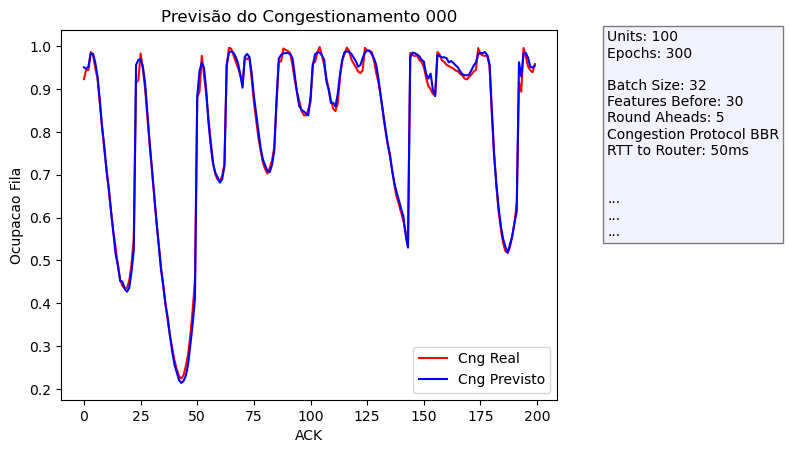

##################Round  1  ##################################
7/7 [==============================] - 2s 47ms/step


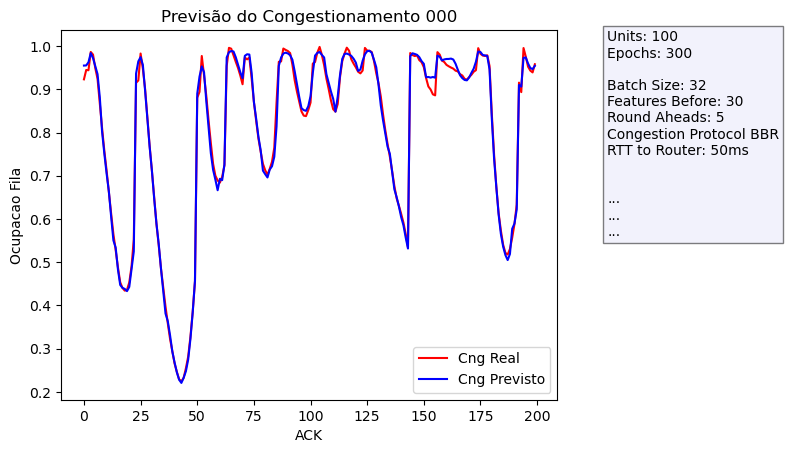

./Exp_0000013/Sat_May_20_16_52_50_2023
Sat_May_20_16_52_50_2023
##################Round  0  ##################################
7/7 [==============================] - 2s 55ms/step


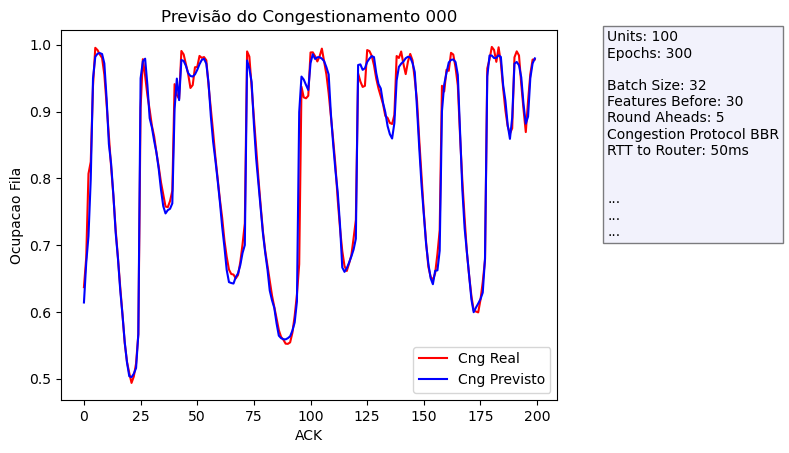

##################Round  1  ##################################
7/7 [==============================] - 2s 61ms/step


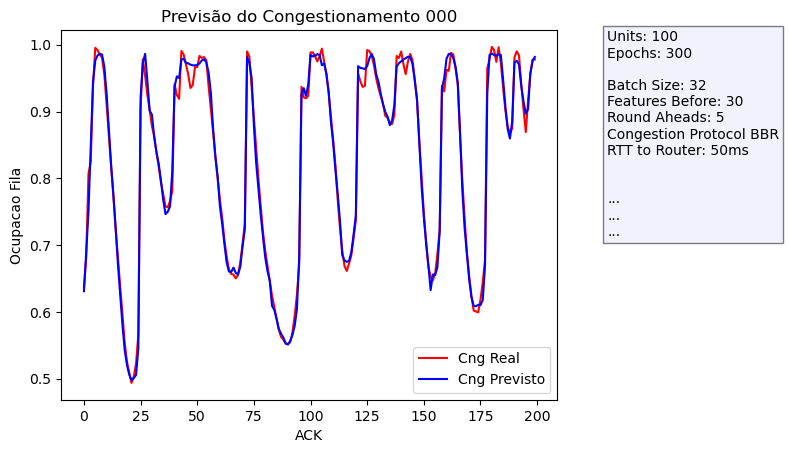

./Exp_0000013/Sat_May_20_16_52_50_2023
Sat_May_20_16_52_50_2023
##################Round  0  ##################################
7/7 [==============================] - 3s 61ms/step


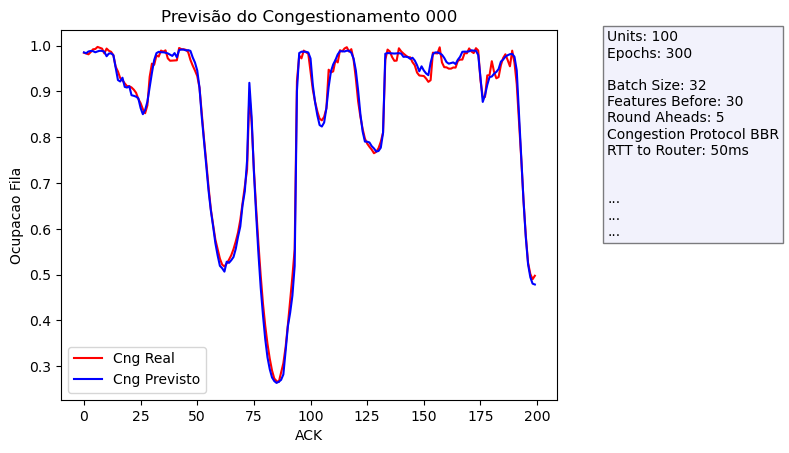

##################Round  1  ##################################
7/7 [==============================] - 3s 63ms/step


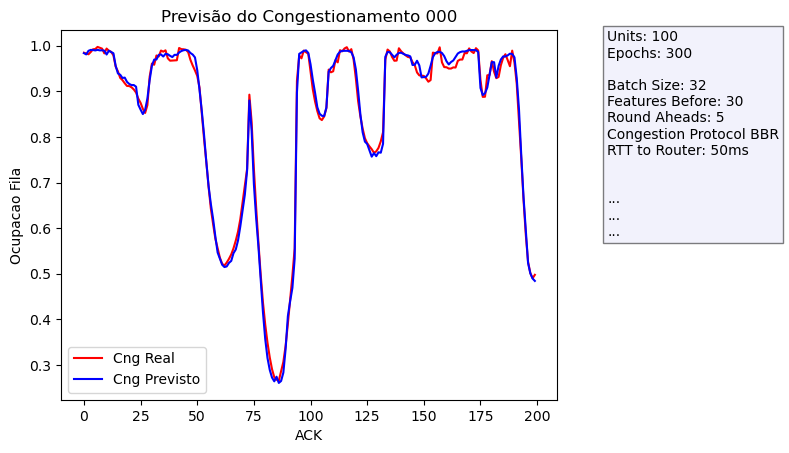

./Exp_0000013/Sat_May_20_16_52_50_2023
Sat_May_20_16_52_50_2023
##################Round  0  ##################################
7/7 [==============================] - 4s 63ms/step


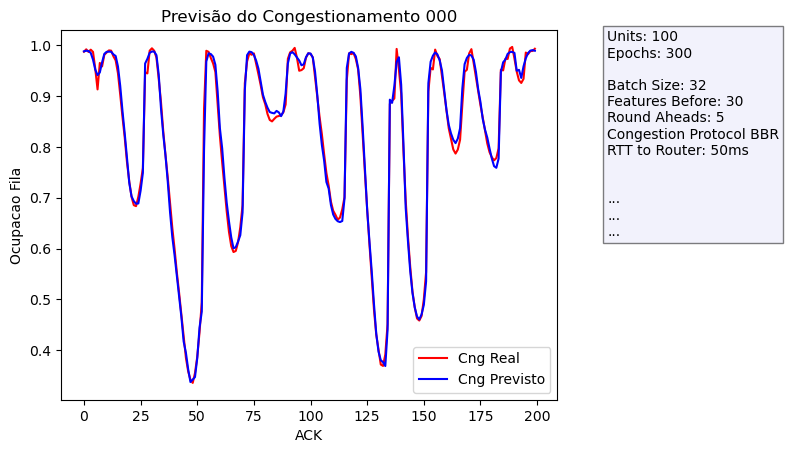

##################Round  1  ##################################
7/7 [==============================] - 3s 67ms/step


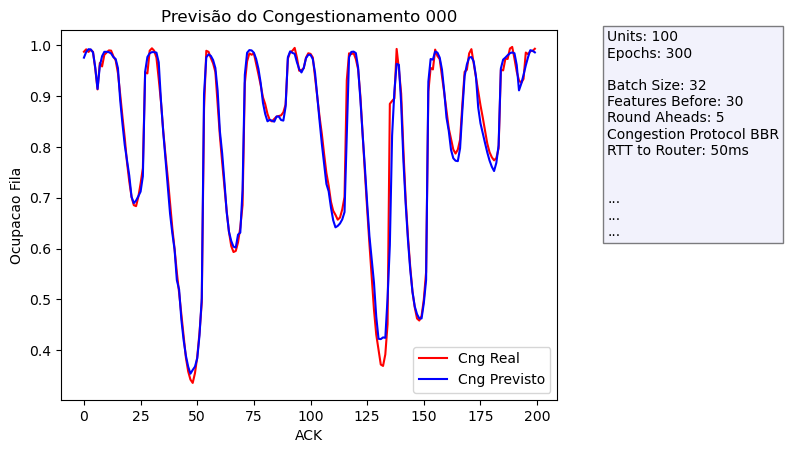

In [2]:
description = "Terminais: 40, 20 longos (4GB), 10 Very Short (10KB) e 10 Short (100KB), entrando no terço final da simulação."+"\n"  
description =description + "Topologia: Dumbell (1000MB,1MB de bottleneck), Terminal base 10ms; servidor 100ms;  RTT1=100ms, Salto RTT= 50ms.\n"
description =description + "Tempo de Simulação:30min.\n"
description = description+ "Prevendo a média móvel.\n"
description = description+ "300 épocas a cada Round.\n"
description = description+ "Concatenação de 09 (nove) experimentos distintos.\n"
description = description+ "Ajuste no RTT_ratio.\n"
description = description+ "Treinamento Sequencial.\n"
exp_dir=""
for i in range (10):
    exp_dir = mfn.GeneralTraining(parExpDir="./Exp_0000013/",
                parPreviousTrainingExpDir=exp_dir,
                parTrainingPath="./Exp_0000013/training_client01"+"_{num_file:0>2}".format(num_file=i)+".csv",
                parTestPath="./Exp_0000013/test_client01.csv",
                parExpDescription=description,
                parSequencialTraining=bool(i))

Agora, depois desse treinamento sequencial, vamos avaliar a aderência a uma simulação que não participou dos dados de treinamento


From File
ack_ewma_normalizer:  1638.01
send_ewma:  2852.0
rtt_ratio_normalizer:  74.1726618705036
cwnd (Bytes):  42340.0
FromFile
85/85 [==============================] - 4s 23ms/step


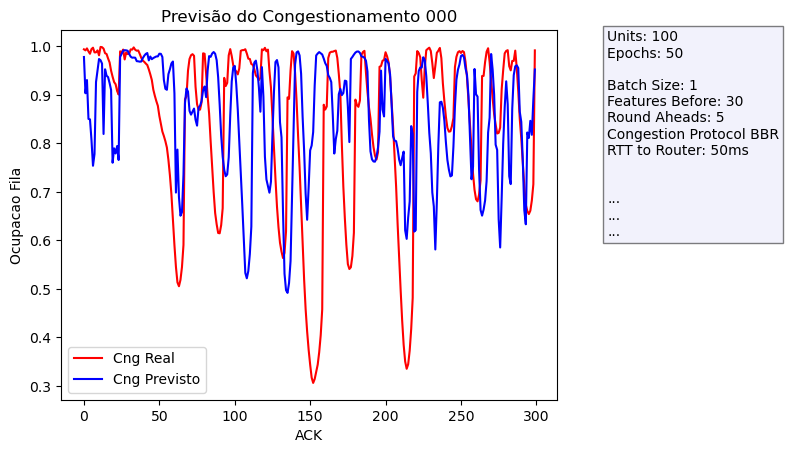

In [15]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila.\n"
description =description + "Modelo com 300 épocas em cada round\n"
description = description+ "Verificando a aderencia sobre um dos modelos concatenados\n"
description = description+ "Dados que não participaram do treinamento, mas gerados na mesma rede.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"

mfn.EvalueteModelLevarage(parPreviousExpTime="Sat_May_20_16_52_50_2023",
                      parPreviousTrainingExpDir="./Exp_0000013/Sat_May_20_16_52_50_2023/",
                      parPreviousTrainingPath="./Exp_0000013/training_client01-09.csv",
                      parPathTestFromAnotherTopology="./Exp_0000013/training_client01_00.csv",
                      parExpDescription=description)

Ainda não está muito na marca. Pensou-se que com um arquivo proveniente de outro fluxo, pode estar havendo alguma falta de
sincronização das features. O código do mode_federated_network foi modificado a fim de que comece a previsão desde os pri-
meiros T registros, até o final. Vamos ver se melhra. Percebeu-se tmabém que as previsões estavam boas apenas para o último arquivo treinado, no caso o 09. É como se o treinamento mais recente apagasse os ganhos do anterior.

From File
ack_ewma_normalizer:  1638.01
send_ewma:  2852.0
rtt_ratio_normalizer:  74.1726618705036
cwnd (Bytes):  42340.0
FromFile
399/399 [==============================] - 10s 21ms/step


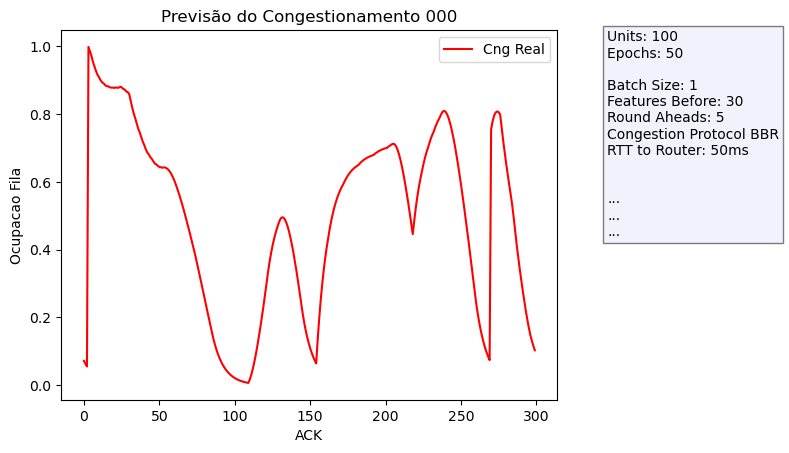

In [6]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila.\n"
description =description + "Modelo com 300 épocas em cada round\n"
description = description+ "Verificando a aderencia sobre um dos modelos concatenados\n"
description = description+ "Dados que não participaram do treinamento, mas gerados na mesma rede.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"

mfn.EvalueteModelLevarage(parPreviousExpTime="Sat_May_20_16_52_50_2023",
                      parPreviousTrainingExpDir="./Exp_0000013/Sat_May_20_16_52_50_2023/",
                      parPreviousTrainingPath="./Exp_0000013/training_client01-09.csv",
                      parPathTestFromAnotherTopology="./Exp_0000013/training_client01_01term_06.csv",
                      parExpDescription=description)

Ainda não está bom. Observou-se que não há qualquer padrão no perfil de preenchimento do buffer.Será que com o TCP isso é diferente? O cubic parece mais estável(ver pasta padrao_variacao_buffer). Vamos fazer a coisa com apenas um terninal....Então vamos fazer um treinamento sequencial com dados de seis simulações com um terminal e ver no que dá

##################Round  0  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
7/7 [==============================] - 2s 22ms/step


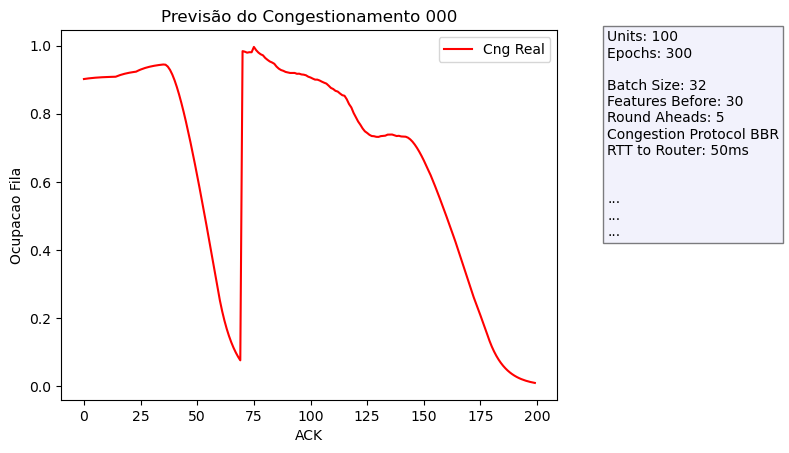

##################Round  1  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
7/7 [==============================] - 2s 27ms/step


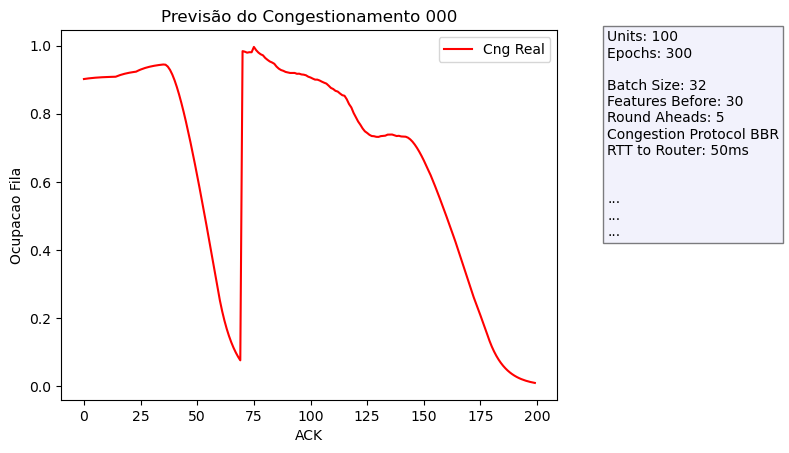

./Exp_0000015/Mon_May_22_17_13_34_2023
Mon_May_22_17_13_34_2023
##################Round  0  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
7/7 [==============================] - 2s 26ms/step


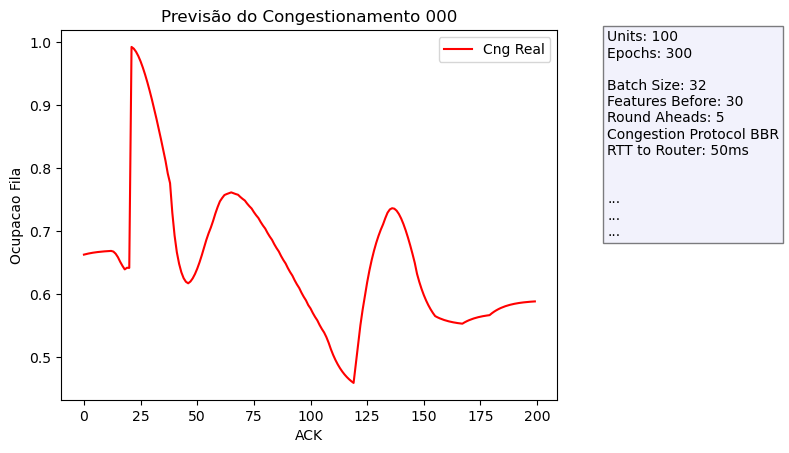

##################Round  1  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
7/7 [==============================] - 2s 27ms/step


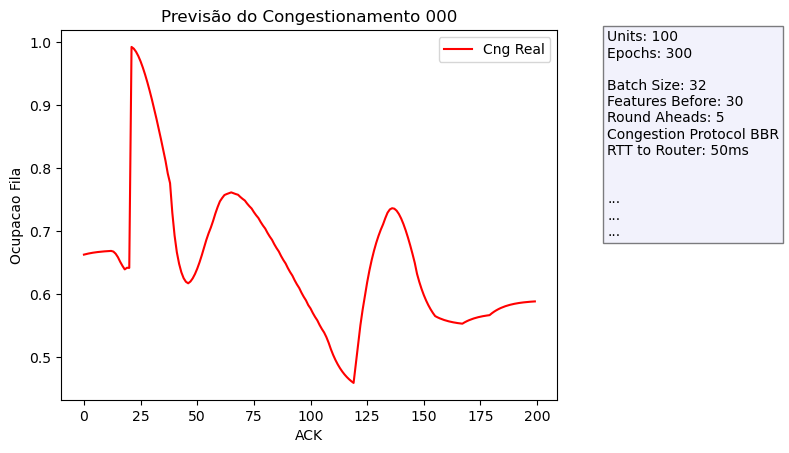

./Exp_0000015/Mon_May_22_17_13_34_2023
Mon_May_22_17_13_34_2023
##################Round  0  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
7/7 [==============================] - 3s 25ms/step


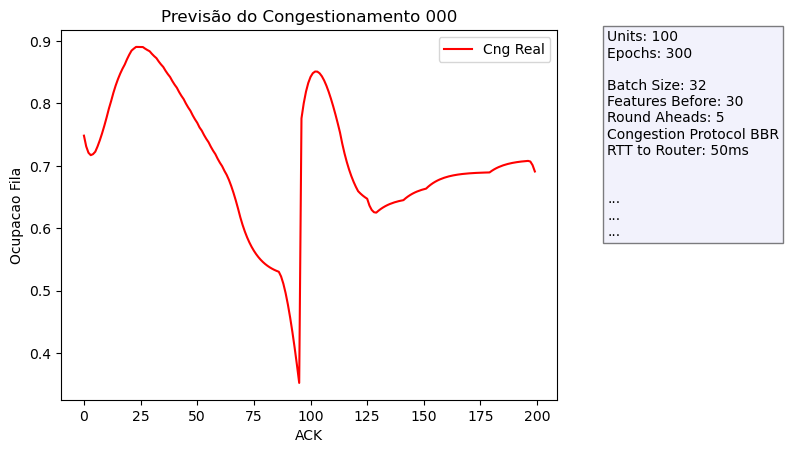

##################Round  1  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
7/7 [==============================] - 3s 24ms/step


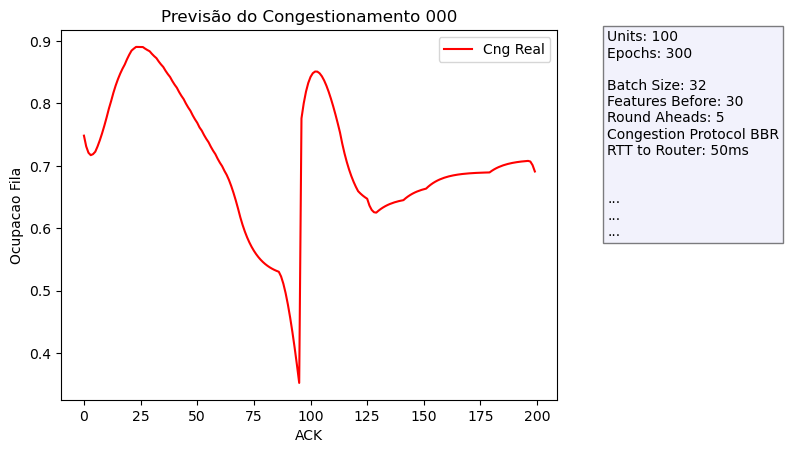

./Exp_0000015/Mon_May_22_17_13_34_2023
Mon_May_22_17_13_34_2023
##################Round  0  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
7/7 [==============================] - 3s 47ms/step


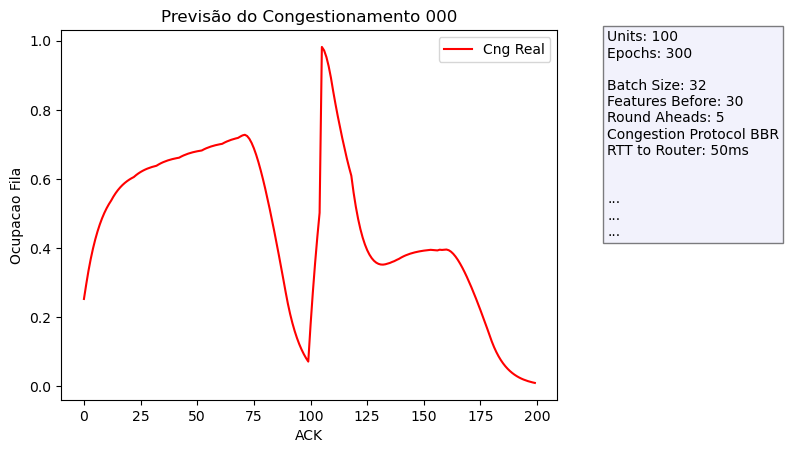

##################Round  1  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
7/7 [==============================] - 2s 45ms/step


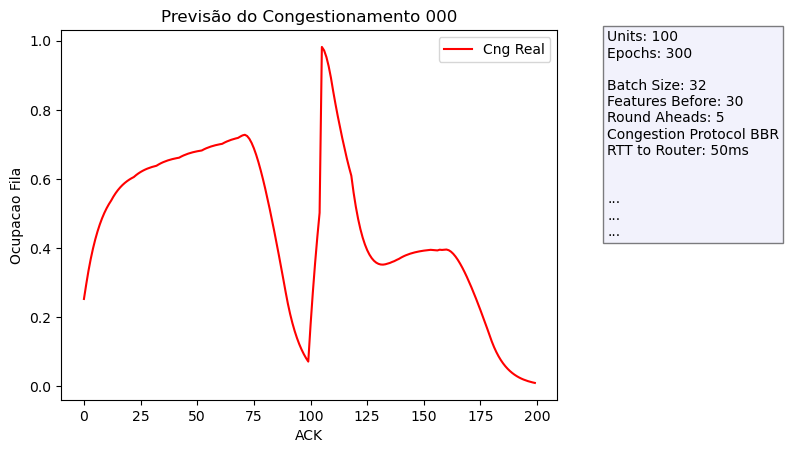

./Exp_0000015/Mon_May_22_17_13_34_2023
Mon_May_22_17_13_34_2023
##################Round  0  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
7/7 [==============================] - 3s 49ms/step


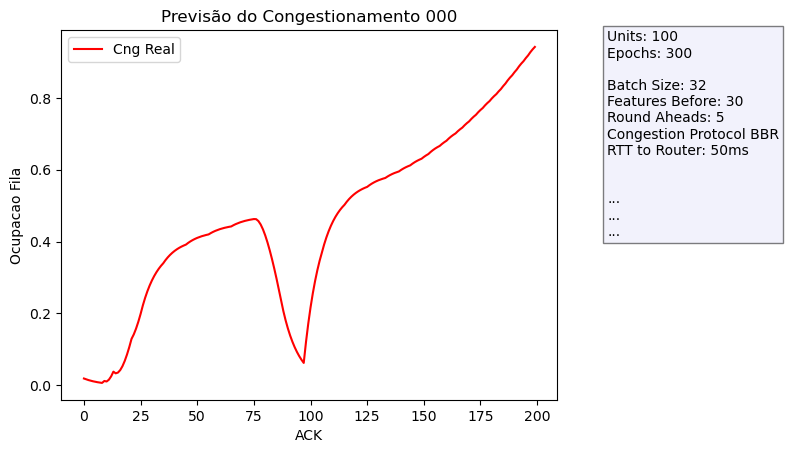

##################Round  1  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
7/7 [==============================] - 3s 55ms/step


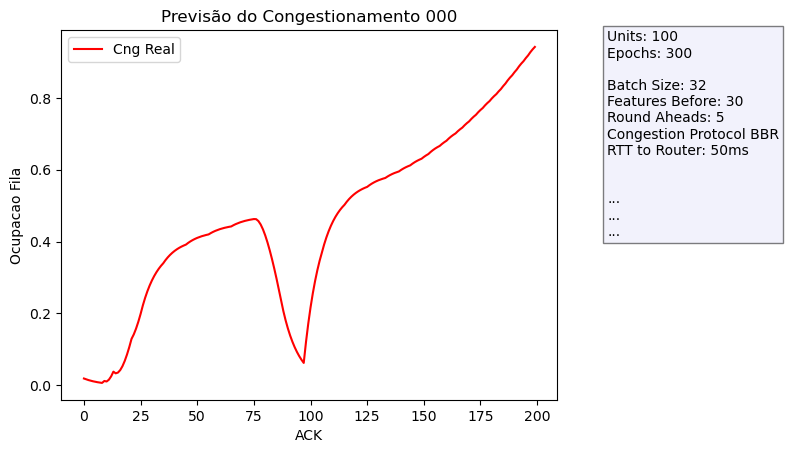

./Exp_0000015/Mon_May_22_17_13_34_2023
Mon_May_22_17_13_34_2023
##################Round  0  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
7/7 [==============================] - 3s 50ms/step


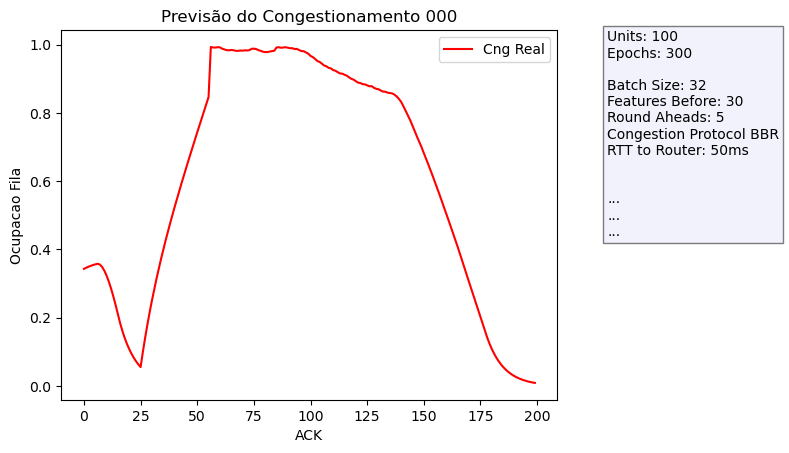

##################Round  1  ##################################
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
7/7 [==============================] - 4s 103ms/step


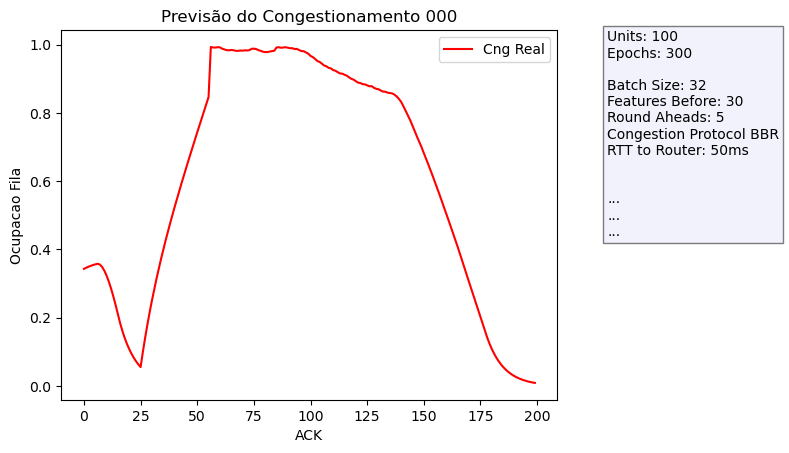

In [7]:
description = "Terminais: 40, 20 longos (4GB), 10 Very Short (10KB) e 10 Short (100KB), entrando no terço final da simulação."+"\n"  
description =description + "Topologia: Dumbell (1000MB,1MB de bottleneck), Terminal base 10ms; servidor 100ms;  RTT1=100ms, Salto RTT= 50ms.\n"
description =description + "Tempo de Simulação:30min.\n"
description = description+ "Prevendo a média móvel.\n"
description = description+ "300 épocas a cada Round.\n"
description = description+ "Concatenação de 09 (nove) experimentos distintos.\n"
description = description+ "Ajuste no RTT_ratio.\n"
description = description+ "Treinamento Sequencial.\n"
exp_dir=""
for i in range (6):
    exp_dir = mfn.GeneralTraining(parExpDir="./Exp_0000015/",
                parPreviousTrainingExpDir=exp_dir,
                parTrainingPath="./Exp_0000015/training_client01_01term"+"_{num_file:0>2}".format(num_file=i)+".csv",
                parTestPath="./Exp_0000015/test_client01.csv",
                parExpDescription=description,
                parSequencialTraining=bool(i))

Agora, vamos verificar a aderência do modelo, desde o mais recentemente treinado até ao mais remoto. Lembrando que é uma topologia com um terminal e um servidor.

From File
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
FromFile
399/399 [==============================] - 20s 42ms/step


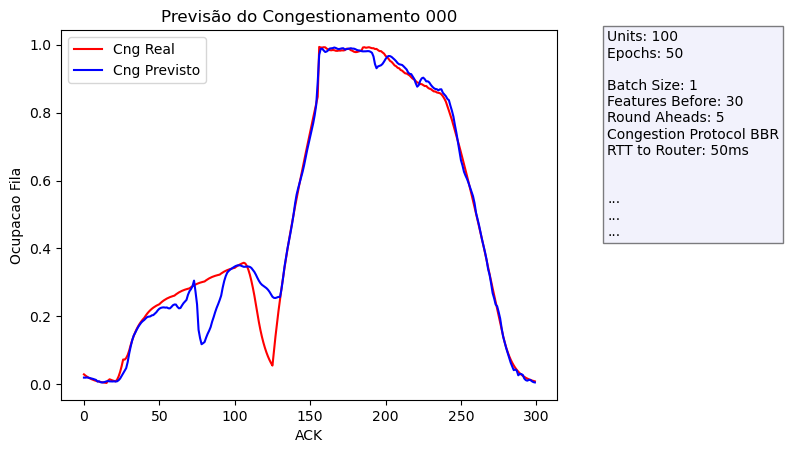

In [3]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila.\n"
description =description + "Modelo com 300 épocas em cada round\n"
description = description+ "Verificando a aderencia sobre um dos modelos concatenados\n"
description = description+ "Dados que participaram do treinamento.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"

mfn.EvalueteModelLevarage(parPreviousExpTime="Mon_May_22_17_13_34_2023",
                      parPreviousTrainingExpDir="./Exp_0000015/Mon_May_22_17_13_34_2023/",
                      parPreviousTrainingPath="./Exp_0000015/training_client01_01term_00-05.csv",
                      parPathTestFromAnotherTopology="./Exp_0000015/training_client01_01term_05.csv",
                      parExpDescription=description)

From File
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
FromFile
343/343 [==============================] - 20s 47ms/step


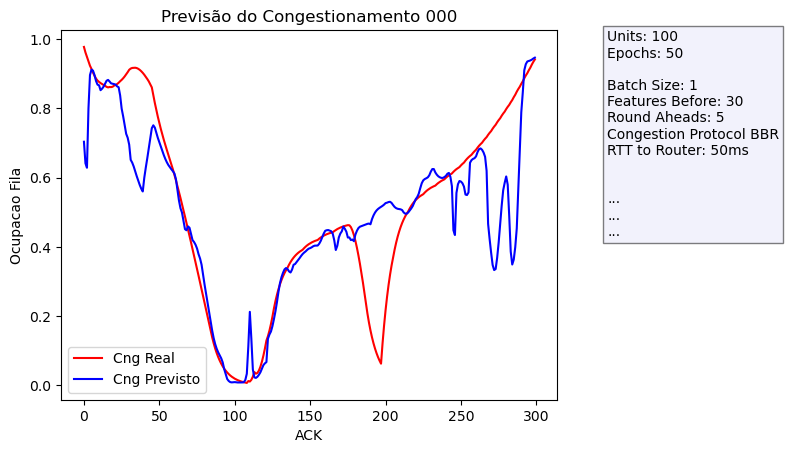

In [4]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila.\n"
description =description + "Modelo com 300 épocas em cada round\n"
description = description+ "Verificando a aderencia sobre um dos modelos concatenados\n"
description = description+ "Dados que participaram do treinamento.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"

mfn.EvalueteModelLevarage(parPreviousExpTime="Mon_May_22_17_13_34_2023",
                      parPreviousTrainingExpDir="./Exp_0000015/Mon_May_22_17_13_34_2023/",
                      parPreviousTrainingPath="./Exp_0000015/training_client01_01term_00-05.csv",
                      parPathTestFromAnotherTopology="./Exp_0000015/training_client01_01term_04.csv",
                      parExpDescription=description)

From File
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
FromFile
392/392 [==============================] - 10s 21ms/step


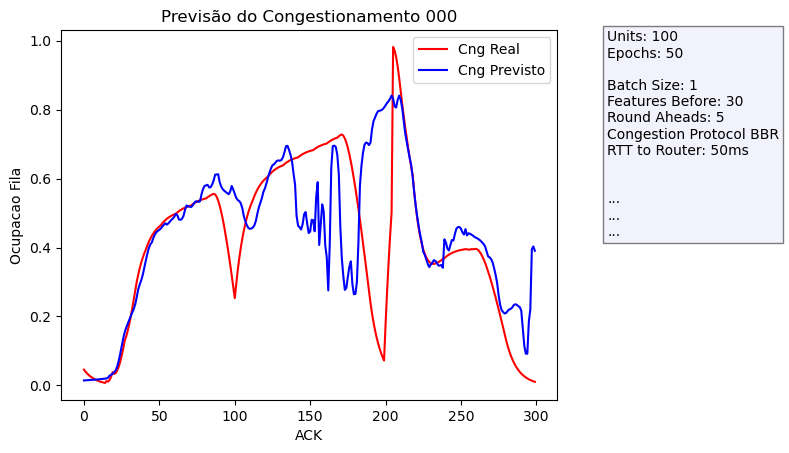

In [5]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila.\n"
description =description + "Modelo com 300 épocas em cada round\n"
description = description+ "Verificando a aderencia sobre um dos modelos concatenados\n"
description = description+ "Dados que participaram do treinamento.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"

mfn.EvalueteModelLevarage(parPreviousExpTime="Mon_May_22_17_13_34_2023",
                      parPreviousTrainingExpDir="./Exp_0000015/Mon_May_22_17_13_34_2023/",
                      parPreviousTrainingPath="./Exp_0000015/training_client01_01term_00-05.csv",
                      parPathTestFromAnotherTopology="./Exp_0000015/training_client01_01term_03.csv",
                      parExpDescription=description)

From File
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
FromFile
440/440 [==============================] - 11s 22ms/step


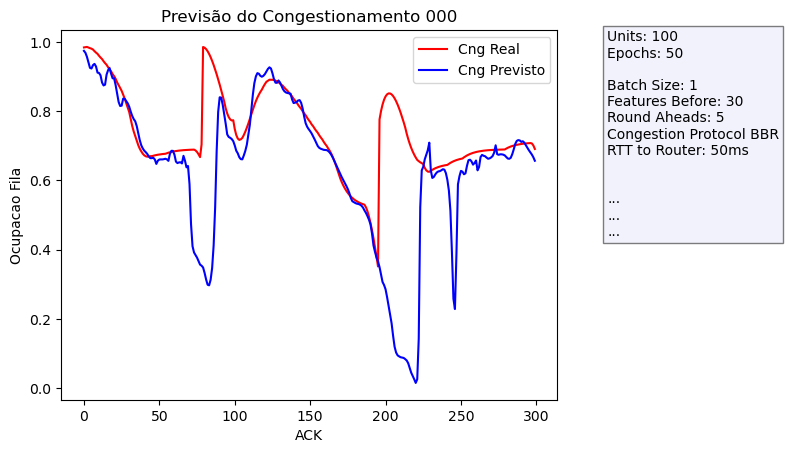

In [6]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila.\n"
description =description + "Modelo com 300 épocas em cada round\n"
description = description+ "Verificando a aderencia sobre um dos modelos concatenados\n"
description = description+ "Dados que participaram do treinamento.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"

mfn.EvalueteModelLevarage(parPreviousExpTime="Mon_May_22_17_13_34_2023",
                      parPreviousTrainingExpDir="./Exp_0000015/Mon_May_22_17_13_34_2023/",
                      parPreviousTrainingPath="./Exp_0000015/training_client01_01term_00-05.csv",
                      parPathTestFromAnotherTopology="./Exp_0000015/training_client01_01term_02.csv",
                      parExpDescription=description)

From File
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
FromFile
313/313 [==============================] - 8s 20ms/step


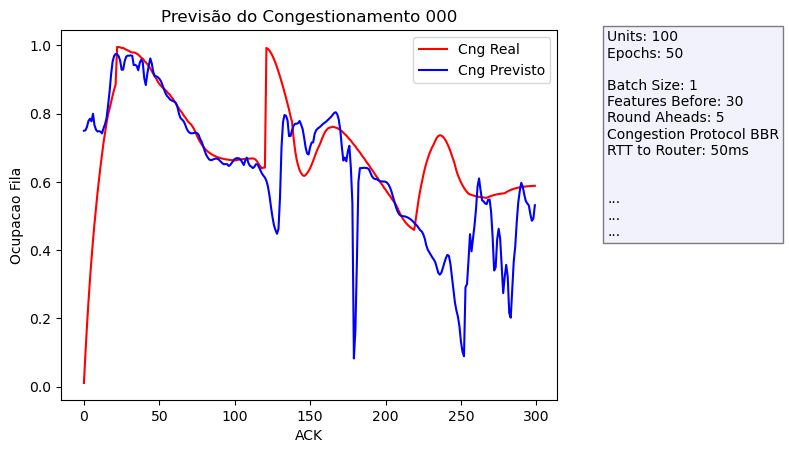

In [7]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila.\n"
description =description + "Modelo com 300 épocas em cada round\n"
description = description+ "Verificando a aderencia sobre um dos modelos concatenados\n"
description = description+ "Dados que participaram do treinamento.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"

mfn.EvalueteModelLevarage(parPreviousExpTime="Mon_May_22_17_13_34_2023",
                      parPreviousTrainingExpDir="./Exp_0000015/Mon_May_22_17_13_34_2023/",
                      parPreviousTrainingPath="./Exp_0000015/training_client01_01term_00-05.csv",
                      parPathTestFromAnotherTopology="./Exp_0000015/training_client01_01term_01.csv",
                      parExpDescription=description)

From File
ack_ewma_normalizer:  3208.75
send_ewma:  3267.72
rtt_ratio_normalizer:  11.623931623931623
cwnd (Bytes):  208780.0
FromFile
371/371 [==============================] - 11s 23ms/step


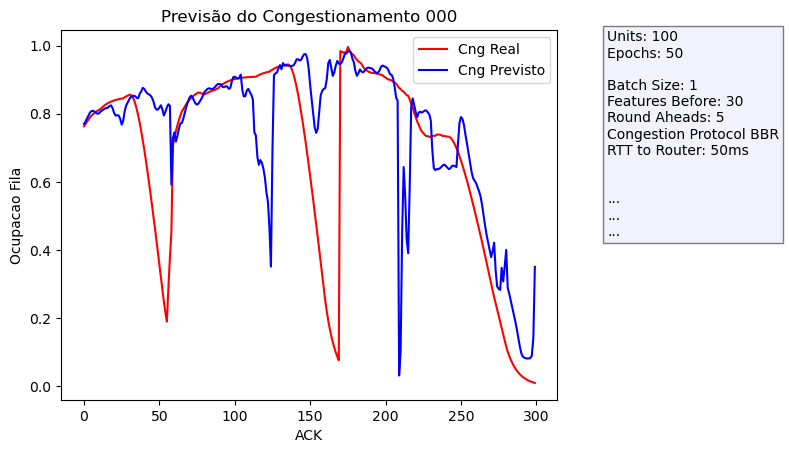

In [8]:
description = "testar com outros dados, mas gerados com uma topologia dumbell, igual a do treinamento."+"\n"  
description =description + "Média móvel da quantidade de pacotes na fila.\n"
description =description + "Modelo com 300 épocas em cada round\n"
description = description+ "Verificando a aderencia sobre um dos modelos concatenados\n"
description = description+ "Dados que participaram do treinamento.\n"
#description = description+ "Na topologia considerada, ajustou-se os RTT entre os roteadores de 0,005ms, pois com roteadores, o processamento da fila faz com que demore mais.\n"
#description = description+ ".\n"

mfn.EvalueteModelLevarage(parPreviousExpTime="Mon_May_22_17_13_34_2023",
                      parPreviousTrainingExpDir="./Exp_0000015/Mon_May_22_17_13_34_2023/",
                      parPreviousTrainingPath="./Exp_0000015/training_client01_01term_00-05.csv",
                      parPathTestFromAnotherTopology="./Exp_0000015/training_client01_01term_00.csv",
                      parExpDescription=description)

Como visto anteriormente, a tônica continua sendo a aderência ao último modelo treinado. Em 25 MAIO 23 foi realizada reunião
com o orientaodor, cujos principais pontos foram:
  1.Ajustar 90% de passado; hoje com 0,125 está em 12,5%
  2.Estruturar uma apresentação em forma de artigo (ênfase na modelagem matemática)
  3.Procurar o professor Lourenço para apresentar até o final desse semestre.

# @@@FIM

Toma um modelo no arquivo e aplica em outro conjunto de dados, em test_client01.csv

In [5]:
import shutil
exp_time=time.ctime();

exp_time = exp_time.replace(":", "_" )
parent_exp_dir = "/content/drive/MyDrive/Colab Notebooks/Exp_000006/Tue May  9 21_01_54 2023/" #de onde vem o modelo treinado
#exp_dir = "/content/drive/MyDrive/Colab Notebooks/Exp_000006/Tue May  9 21_01_54 2023/"
exp_dir=os.path.join(parent_exp_dir, exp_time)
os.mkdir(exp_dir)
shutil.copy2(parent_exp_dir+"model_0.json",exp_dir+"/model_0.json")
shutil.copy2(parent_exp_dir+"model_weights_0.h5",exp_dir+"/model_weights_0.h5")

time.sleep(30)
exp_epoch = 50
exp_units = 100
exp_batch_size=1
exp_T=30
exp_steps_out =5
exp_congestion_protocol = "BBR"
exp_web_nodes= 2

client01_id=0
client01_training_path= "/content/drive/MyDrive/Colab Notebooks/Exp_000006/training_client01.csv"
client01_test_path = "/content/drive/MyDrive/Colab Notebooks/Exp_000006/test_client01.csv"
client01_epoch = exp_epoch
client01_units = exp_units;
client01_batch_size=exp_batch_size
client01_T=exp_T
client01_steps_out = exp_steps_out
client01_congestion_protocol = exp_congestion_protocol
client01_web_nodes= exp_web_nodes
client01_RTT_router = "140.99769e-01ms"


#Registando dados relativos ao cliente 0, comum a todos os clientes, no readme_cliente_000.txt

#file_path = exp_dir+"/readme{:0>3}"+".txt"

#f = open(file_path.format(client01_id), "w")

#f.write(str(client01_RTT_router))
#f.close()

objClient1 = Client(client01_id,
                    client01_training_path,
                    client01_test_path, 
                    client01_epoch,
                    client01_units,
                    client01_batch_size,
                    client01_T,
                    client01_steps_out,
                    client01_congestion_protocol,
                    client01_web_nodes,
                    client01_RTT_router,
                    exp_time,
                    exp_dir)
  ###################Pelo Arquivo#################################
#objClient1.RefreshModelFromFile(0) #não precisa, pois não haverá mais treinamento
objClient1.GetPrevision(0,True)
objClient1.PlotResults()
  #objClient2.GetPrevision()
  #objClient2.PlotResults()

From File
FromFile
7/7 [==============================] - 5s 6ms/step


<IPython.core.display.Javascript object>

In [ ]:
def PlotarGrafico_cwnd(parTrainingData, parColor):
  base = pd.read_csv(parTrainingData)
  base = base.dropna()
  base_treinamento = base.iloc[:, [7]].values
  base_treinamento = np.array(base_treinamento)
  fig, graph = plt.subplots()

  graph.plot(base_treinamento, color = parColor, label = 'Cng real')
  textbox = '\n'.join([
    'Evaluation flow name: ',
    'Evaluation description: ',
    '',
    'Evaluation flow SVN Revision: ',
    'Dataset path: ',
    'Dataset name: ',
    '',
    'Filter: ',
    'Grouping: ',
    'Files selected with filter and grouping: ',
    'Files with all needed signals: ',
    '',
    '...',
    '...',
    '...',
  ])

  bbox = dict(boxstyle='square', facecolor='lavender', alpha=0.5)
  fig.text(1.1,1,textbox,fontsize=10,transform=graph.transAxes, bbox=bbox, verticalalignment='top')
  fig.show()





PlotarGrafico_cwnd("/content/drive/MyDrive/Colab Notebooks/Exp_000006/training_client01.csv","red")
PlotarGrafico_cwnd("/content/drive/MyDrive/Colab Notebooks/Exp_000006/training_client02.csv","blue")

  #base_treinamento = base.iloc[:, [2,4,6]].values


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
###################Testando#################################

#objClient1.LoadTestData()
objClient1.GetPrevision()

#objClient2.LoadTestData()
objClient2.GetPrevision()

'''
#objClient3.LoadTestData()
objClient3.GetPrevision()
'''


In [ ]:
#########################Registrando no Servidor Central#######################################

objServe.RegisterClient(objClient1)
objServe.RegisterClient(objClient2)
#objServe.RegisterClient(objClient3)

#########################Consolidando os modelos#######################################

objServe.ConsolidateModels()
objServe.FeedBackConsolidatedModel()

#########################Testando o novo modelo#######################################
#########################Atualizando, conforme o caso#######################################

objClient1.RefreshModel()
objClient2.RefreshModel()
#objClient3.RefreshModel()
#print (objClient3.currentConfusionMatriz)

#########################Novas aproximações, após atualização ou não dos modelos#######################################

objClient1.GetPrevision()
objClient2.GetPrevision()

#objClient3.GetPrevision()
#print (objClient3.currentConfusionMatriz)



In [ ]:
listaBase = [["amarelo","verde","preto"], ["azul","abóbora","marrom"], ["uva","laranja","branco"]]
arrays_in_Layer=[]
lstTemp = []
lst_arrays_in_Layer = []
for layer in listaBase:
  for arr in layer:
    lstTemp.append(arr)
  arrays_in_Layer = [i for i in lstTemp]
  lst_arrays_in_Layer.append(arrays_in_Layer)
  lstTemp.clear()
print (lst_arrays_in_Layer)

[['amarelo', 'verde', 'preto'], ['azul', 'abóbora', 'marrom'], ['uva', 'laranja', 'branco']]


In [ ]:
base_iris = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/iris.csv")
previsores_iris = base_iris.iloc[:,0:4].values 
classes_iris = base_iris.iloc[:,4].values
labelencoder = LabelEncoder()
classes_iris = labelencoder.fit_transform(classes_iris)
classes_dummy_iris = np_utils.to_categorical(classes_iris)
# iris setosa     1 0 0
# iris virginica  0 1 0
# iris versicolor 0 0 1
previsores_treinamento_iris, previsores_teste_iris, classe_treinamento_iris,classe_teste_iris = train_test_split(previsores_iris,classes_dummy_iris, test_size=0.25)
classificador = Sequential()
classificador.add(Dense(units = 4, activation = 'relu', input_dim = 4))
classificador.add(Dense(units = 4, activation = 'relu'))
classificador.add(Dense(units = 3, activation = 'softmax'))
classificador.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
                      metrics = ['categorical_accuracy'])
classificador.fit(previsores_treinamento_iris, classe_treinamento_iris, batch_size = 10,
                  epochs = 1000)

resultado_iris = classificador.evaluate(previsores_teste_iris, classe_teste_iris)
previsoes_iris = classificador.predict(previsores_teste_iris)
previsoes_iris = previsoes_iris > 0.5
#classe_teste2 e previsoes2 são listas
classe_teste2 = [np.argmax(t) for t in classe_teste_iris]
previsoes2 = [np.argmax(t) for t in previsoes_iris]
matriz_iris = confusion_matrix(previsoes2, classe_teste2)
print(matriz_iris)



In [ ]:
def LoadTrainingDataSet():
      #base = pd.read_csv(self.trainingPath)
      #base = base.dropna()
      #base_treinamento = base.iloc[:, [2,4,6,8,9]].values
      base_treinamento = np.array([
                          [0.0618679825944638,1.48529333300134E-05,0.849658635009267,	1,	0.8],
                          [0.0618642722717276,1.29963255564132E-05,0.856697088426436,0.960369635326222,0.8],
                          [0.061861180336114,	1.13717804155358E-05,0.863735541843606,0.915095509799057,	0.78],
                          [0.0618582945295414,9.95030786359384E-06,0.870773995260775,0.892458447035475,	0.76],
                          [0.0620104177617272,8.70651048799314E-06,0.877953217746287,0.869821384271893,	0.74],
                          [0.06214357712215,  7.6182100159712E-06, 0.8851324402318,0.860208385016125,	0.72],
                          [0.0622600400302597	,6.66593154081194E-06	,0.892311662717312,0.847184321508311,	0.7],
                          [0.0623620739055063	,5.83269009821044E-06	,0.899490885202825,	0.847184321508311,	0.68],
                          [0.0624511216511761	,5.1035993896084E-06,0.906670107688337,0.847184321508311,	0.69],
                          [0.062529244557678	,4.46565835855882E-06	,0.91384933017385	,0.847184321508311,	0.78],
                          [0.0625974732702166,3.9074488405761E-06	,0.921028552659362	,0.847184321508311,	0.58],
                          [0.0626572506920783	,3.41901106601549E-06	,0.928207775144875,0.847184321508311,	0.48],
                          [0.0627096074684674	,2.99163023643782E-06	,0.935386997630387,0.847184321508311,	0.38],
                          [0.0627553681155477	,2.61767645688309E-06	,0.9425662201159,0.0226370627635822,	0.18],
                          [0.0627953571494827	,2.29048023874991E-06	,0.949745442601412,0.0226370627635822,	0.28],


      ])
      #normalizador = MinMaxScaler(feature_range=(0,1))
      #base_treinamento = normalizador.fit_transform(base_treinamento)
      previsores=[]
      real_congestion = []

      real_congestion_ahead = []

      T=3

      n_steps_out = 4

      for i in range(T, base_treinamento.shape[0]):
        end_ix = i+n_steps_out
        if end_ix > base_treinamento.shape[0]:
          break;
        #previsores.append(base_treinamento[i-self.T:i, 0:4])#o que é considerado é o limite superior do rante -1
        previsores.append(base_treinamento[i-T:i, 0:4])#o que é considerado é o limite superior do rante -1 e sem a informação do percentual de ocupação do buffer
        real_congestion.append(base_treinamento[(i-1)+n_steps_out,4])#
        '''
        #Se quiser repetir os últimos valores
        real_congestion_ahead.clear();
        
        for k in range (self.n_steps_out):
          if i+k < base_treinamento.shape[0]:
            #print(i+k,"---> ", base_treinamento[i+k, 3])
            real_congestion_ahead.append(base_treinamento[i+k, 4])#O resultado é do último cara
          else:
            real_congestion_ahead.append(base_treinamento[base_treinamento.shape[0]-1, 4])#O resultado é do último cara
        real_congestion.append(real_congestion_ahead.copy())
        '''
        #print(real_congestion)
        #input("real_congestion ++")
      previsores, real_congestion = np.array(previsores), np.array(real_congestion)
      return previsores, real_congestion



      '''

      #base_treinamento.shape[0] número de linhas dos dados de treinamento
      #"-self.n_steps_out", pois, se não estoura, não dá para fazer 5 a frente a partir do último                                                                   
      for i in range(T, base_treinamento.shape[0]):
        end_ix = i+n_steps_out
        if end_ix > base_treinamento.shape[0]:
          break;
        #previsores.append(base_treinamento[i-self.T:i, 0:4])#o que é considerado é o limite superior do rante -1
        previsores.append(base_treinamento[i-T:i, 0:4])#o que é considerado é o limite superior do rante -1 e sem a informação do percentual de ocupação do buffer
        real_congestion.append(base_treinamento[(i-1)+n_steps_out,4])
        
        #Se quiser repetir os últimos valores
        real_congestion_ahead.clear();
        
        for k in range (self.n_steps_out):
          if i+k < base_treinamento.shape[0]:
            #print(i+k,"---> ", base_treinamento[i+k, 3])
            real_congestion_ahead.append(base_treinamento[i+k, 4])#O resultado é do último cara
          else:
            real_congestion_ahead.append(base_treinamento[base_treinamento.shape[0]-1, 4])#O resultado é do último cara
        real_congestion.append(real_congestion_ahead.copy())
        
        #print(real_congestion)
        #input("real_congestion ++")
      previsores, real_congestion = np.array(previsores), np.array(real_congestion)
      
      print("shape previsores: ")
      print(previsores.shape)
      #input("shape dos previsores")
      #print(previsores)
      #input("exibidos os previsores")
      print("Real Congestion: ")
      print(real_congestion)
      #input("exibidos os Congestionamentos Reais")
      input_shape = previsores.shape[1]
      return previsores, real_congestion
      '''

p,r = LoadTrainingDataSet()
for i in range(p.shape[0]):
  print(p[i], r[i])


[[6.18679826e-02 1.48529333e-05 8.49658635e-01 1.00000000e+00]
 [6.18642723e-02 1.29963256e-05 8.56697088e-01 9.60369635e-01]
 [6.18611803e-02 1.13717804e-05 8.63735542e-01 9.15095510e-01]] 0.7
[[6.18642723e-02 1.29963256e-05 8.56697088e-01 9.60369635e-01]
 [6.18611803e-02 1.13717804e-05 8.63735542e-01 9.15095510e-01]
 [6.18582945e-02 9.95030786e-06 8.70773995e-01 8.92458447e-01]] 0.68
[[6.18611803e-02 1.13717804e-05 8.63735542e-01 9.15095510e-01]
 [6.18582945e-02 9.95030786e-06 8.70773995e-01 8.92458447e-01]
 [6.20104178e-02 8.70651049e-06 8.77953218e-01 8.69821384e-01]] 0.69
[[6.18582945e-02 9.95030786e-06 8.70773995e-01 8.92458447e-01]
 [6.20104178e-02 8.70651049e-06 8.77953218e-01 8.69821384e-01]
 [6.21435771e-02 7.61821002e-06 8.85132440e-01 8.60208385e-01]] 0.78
[[6.20104178e-02 8.70651049e-06 8.77953218e-01 8.69821384e-01]
 [6.21435771e-02 7.61821002e-06 8.85132440e-01 8.60208385e-01]
 [6.22600400e-02 6.66593154e-06 8.92311663e-01 8.47184322e-01]] 0.58
[[6.21435771e-02 7.6182100

In [ ]:
def LoadTestData():
      
      base = [[0.0618679825944638,1.48529333300134E-05,0.849658635009267,	1,	0.8],
                          [0.0618642722717276,1.29963255564132E-05,0.856697088426436,0.960369635326222,0.8],
                          [0.061861180336114,	1.13717804155358E-05,0.863735541843606,0.915095509799057,	0.78],
                          [0.0618582945295414,9.95030786359384E-06,0.870773995260775,0.892458447035475,	0.76],
                          [0.0620104177617272,8.70651048799314E-06,0.877953217746287,0.869821384271893,	0.74],
                          [0.06214357712215,  7.6182100159712E-06, 0.8851324402318,0.860208385016125,	0.72],
                          [0.0622600400302597	,6.66593154081194E-06	,0.892311662717312,0.847184321508311,	0.7],
                          [0.0623620739055063	,5.83269009821044E-06	,0.899490885202825,	0.847184321508311,	0.68],
                          [0.0624511216511761	,5.1035993896084E-06,0.906670107688337,0.847184321508311,	0.69],
                          [0.062529244557678	,4.46565835855882E-06	,0.91384933017385	,0.847184321508311,	0.18],
      ]
   
      base_teste =        [[0.0618679825944638,1.48529333300134E-05,0.849658635009267,	1,	0.8],
                          [0.0618642722717276,1.29963255564132E-05,0.856697088426436,0.960369635326222,0.40],
                          [0.061861180336114,	1.13717804155358E-05,0.863735541843606,0.915095509799057,	0.78],
                          [0.0618582945295414,9.95030786359384E-06,0.870773995260775,0.892458447035475,	0.76],
                          [0.0620104177617272,8.70651048799314E-06,0.877953217746287,0.869821384271893,	0.74],
                          [0.06214357712215,  7.6182100159712E-06, 0.8851324402318,0.860208385016125,	0.72],
                          [0.0622600400302597	,6.66593154081194E-06	,0.892311662717312,0.847184321508311,	0.7],
                          [0.0623620739055063	,5.83269009821044E-06	,0.899490885202825,	0.847184321508311,	0.68],
                          [0.0624511216511761	,5.1035993896084E-06,0.906670107688337,0.847184321508311,	0.69],
                          [0.062529244557678	,4.46565835855882E-06	,0.91384933017385	,0.847184321508311,	0.78],
                          [0.0625974732702166,3.9074488405761E-06	,0.921028552659362	,0.847184321508311,	0.58],
                          [0.0626572506920783	,3.41901106601549E-06	,0.928207775144875,0.847184321508311,	0.48],
                          [0.0627096074684674	,2.99163023643782E-06	,0.935386997630387,0.847184321508311,	0.38],
                          [0.0627553681155477	,2.61767645688309E-06	,0.9425662201159,0.0226370627635822,	0.18],
                          [0.0627953571494827	,2.29048023874991E-06	,0.949745442601412,0.0226370627635822,	0.28]
            ]

      #self.real_congestion_test = base_teste.iloc[:, 5:6].values
      base = pd.DataFrame(base)
      base_teste = pd.DataFrame(base_teste)
      real_congestion_test = base_teste.iloc[:, 4:5]      
      #print("antes de deslocar")
      #print(self.real_congestion_test)

      T=3

      n_steps_out = 4      
     
      frames = [base, base_teste]
      base_completa = pd.concat(frames)
      '''
      base_completa = base_completa.drop('#Ack', axis =1) #
      base_completa = base_completa.drop('ack_ewma(ms)', axis =1)
      base_completa = base_completa.drop('send_ewma(ms)', axis =1)
      base_completa = base_completa.drop('rtt_tatio', axis =1)
      base_completa = base_completa.drop('cwnd (Bytes)', axis =1)
      base_completa = base_completa.drop('Last Router Ocupation Ack Arriaval(Packets)', axis =1)#O que se quer prever
      base_completa = base_completa.drop('Last Router Ocupation Packet Sent(Packets)', axis =1)
      base_completa = base_completa.drop('Network Situation', axis =1)
      base_completa = base_completa.drop('AckArrival(ms)', axis =1)
      base_completa = base_completa.drop('TSInsideAck(ms)', axis =1)
      base_completa = base_completa.drop('RTTAck(ms)', axis =1)
      '''
      entradas = base_completa[len(base_completa) - len(base_teste) - (T+n_steps_out-1):].values
      #base_teste_features = base_teste.iloc[:, [1,2,3,6]].values
      print("#############len(base_teste): ",len(base_teste))
      len_base_teste = len(base_teste)
      X_teste = []
      Y_teste=[]

      for i in range(T+n_steps_out-1, len(base_teste)+T+n_steps_out-1): # para as duzentas previsoes, o mesmo tramanho do Teste.csv, ou seja 290-90
        #X_teste.append(entradas[i-self.T:i,0:4])
        #end_ix = i+self.n_steps_out
        if i >= entradas.shape[0]:
          break;
        X_teste.append(entradas[i-(T+n_steps_out-1):i-(n_steps_out-1),0:4])
        Y_teste.append(entradas[i,4])


      '''
      #só lembrar que quando n_steps_out=1 não se deve fazer nada!
      entradas = base_completa[len(base_completa) - len(base_teste) - (T+n_steps_out-1):].values
      #base_teste_features = base_teste.iloc[:, [1,2,3,6]].values
      print("#############len(base_teste): ",len(base_teste))
      len_base_teste = len(base_teste)
      X_teste = []
      Y_teste = []

      for i in range(T+n_steps_out-1, len(base_teste)+T+n_steps_out-1): # para as duzentas previsoes, o mesmo tramanho do Teste.csv, ou seja 290-90
        #X_teste.append(entradas[i-self.T:i,0:4])
        #end_ix = i+n_steps_out
        if i >= entradas.shape[0]:
          break;
        X_teste.append(entradas[i-(T+n_steps_out-1):i-(n_steps_out-1),0:4])
        Y_teste.append(entradas[i,4])

        #previsores.append(base_treinamento[i-self.T:i, 0:4])#o que é considerado é o limite superior do rante -1
        #real_congestion.append(base_treinamento[(i-1)+self.n_steps_out,4])#
        #print("Previsor")
        #print(X_teste[i-self.T])
        #input("Exibido mais um previsor")

      '''
      test_vectors, real_congestion_test = np.array(X_teste), np.array(Y_teste) # equivalente ao X_teste
      return test_vectors, real_congestion_test


p,r = LoadTestData()
for i in range(p.shape[0]):
  print(p[i], r[i])


#############len(base_teste):  15
[[6.20104178e-02 8.70651049e-06 8.77953218e-01 8.69821384e-01]
 [6.21435771e-02 7.61821002e-06 8.85132440e-01 8.60208385e-01]
 [6.22600400e-02 6.66593154e-06 8.92311663e-01 8.47184322e-01]] 0.8
[[6.21435771e-02 7.61821002e-06 8.85132440e-01 8.60208385e-01]
 [6.22600400e-02 6.66593154e-06 8.92311663e-01 8.47184322e-01]
 [6.23620739e-02 5.83269010e-06 8.99490885e-01 8.47184322e-01]] 0.4
[[6.22600400e-02 6.66593154e-06 8.92311663e-01 8.47184322e-01]
 [6.23620739e-02 5.83269010e-06 8.99490885e-01 8.47184322e-01]
 [6.24511217e-02 5.10359939e-06 9.06670108e-01 8.47184322e-01]] 0.78
[[6.23620739e-02 5.83269010e-06 8.99490885e-01 8.47184322e-01]
 [6.24511217e-02 5.10359939e-06 9.06670108e-01 8.47184322e-01]
 [6.25292446e-02 4.46565836e-06 9.13849330e-01 8.47184322e-01]] 0.76
[[6.24511217e-02 5.10359939e-06 9.06670108e-01 8.47184322e-01]
 [6.25292446e-02 4.46565836e-06 9.13849330e-01 8.47184322e-01]
 [6.18679826e-02 1.48529333e-05 8.49658635e-01 1.00000000e+00]